# Numpy 기초 실습

학습 목표:
1. NumPy 배열 생성 방법 익히기
2. 배열 속성 이해하기
3. 기본 연산 실습


작성일:2025-08-22

In [6]:
import numpy as np

# Python 리스트 - 각 원소가 다른 메모리 위치에 저장
python_list = [1, 2, 3, 4, 5]
print(f"리스트 각 원소의 메모리 주소:")
for i, item in enumerate(python_list):
    print(f"  [{i}]: {id(item)}")

# NumPy 배열 - 연속된 메모리 블록에 저장
numpy_array = np.array([1, 2, 3, 4, 5])
print(f"\nNumPy 배열 정보:")
print(f"  데이터 주소: {numpy_array.data}")
print(f"  연속 메모리 여부: {numpy_array.flags['C_CONTIGUOUS']}")
print(f"  각 원소 크기: {numpy_array.itemsize} bytes")
print(f"  총 메모리 사용량: {numpy_array.nbytes} bytes")

리스트 각 원소의 메모리 주소:
  [0]: 137156183362568
  [1]: 137156183362600
  [2]: 137156183362632
  [3]: 137156183362664
  [4]: 137156183362696

NumPy 배열 정보:
  데이터 주소: <memory at 0x7cbde8455d80>
  연속 메모리 여부: True
  각 원소 크기: 8 bytes
  총 메모리 사용량: 40 bytes


In [7]:
# 버전 확ㅇ인
print(f"NumPy version:{np.__version__}")

NumPy version:2.3.2


핵심 차이점:

- Python 리스트: 각 원소가 서로 다른 메모리 위치 → 접근 시 포인터 추적 필요 <br>
- NumPy 배열: 연속된 메모리 블록 → 주소 계산으로 바로 접근 가능

## 🏗️ 배열 생성 방법들의 원리
### 1. 기본 생성 함수들
`np.array()` - 가장 기본적인 생성방법 

In [8]:
# 1차원 배열
arr_1d = np.array([1, 2, 3, 4, 5])
print(f"1D 배열: {arr_1d}")
print(f"Shape: {arr_1d.shape}, Ndim: {arr_1d.ndim}")

# 2차원 배열 (행렬)
arr_2d = np.array([[1, 2, 3], 
                   [4, 5, 6]])
print(f"2D 배열:\n{arr_2d}")
print(f"Shape: {arr_2d.shape}, Ndim: {arr_2d.ndim}")

# 3차원 배열 (텐서)
arr_3d = np.array([[[1, 2], [3, 4]], 
                   [[5, 6], [7, 8]]])
print(f"3D 배열:\n{arr_3d}")
print(f"Shape: {arr_3d.shape}, Ndim: {arr_3d.ndim}")

# 데이터 타입 명시적 지정
arr_float = np.array([1, 2, 3], dtype=np.float64)
arr_int = np.array([1.7, 2.3, 3.9], dtype=np.int32)
print(f"Float 배열: {arr_float}, dtype: {arr_float.dtype}")
print(f"Int 배열: {arr_int}, dtype: {arr_int.dtype}")

1D 배열: [1 2 3 4 5]
Shape: (5,), Ndim: 1
2D 배열:
[[1 2 3]
 [4 5 6]]
Shape: (2, 3), Ndim: 2
3D 배열:
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
Shape: (2, 2, 2), Ndim: 3
Float 배열: [1. 2. 3.], dtype: float64
Int 배열: [1 2 3], dtype: int32


원리 설명:

- NumPy는 중첩된 Python 리스트를 보고 차원을 자동 추론
- 가장 안쪽 리스트의 길이가 마지막 차원의 크기가 됨
- 모든 원소를 동일한 데이터 타입으로 변환 (형변환 발생 가능)

### `np.zeros()`, `np.ones()`, `np.full()` - 특정 값으로 초기화

In [9]:
# zeros: 0으로 채워진 배열
zeros_2d = np.zeros((3, 4))
zeros_3d = np.zeros((2, 3, 4))
print(f"2D zeros:\n{zeros_2d}")
print(f"3D zeros shape: {zeros_3d.shape}")

# ones: 1로 채워진 배열
ones_2d = np.ones((2, 5))
ones_bool = np.ones((3, 3), dtype=bool)
print(f"2D ones:\n{ones_2d}")
print(f"Boolean ones:\n{ones_bool}")

# full: 지정한 값으로 채워진 배열
full_array = np.full((3, 3), 7)
full_pi = np.full((2, 4), np.pi)
print(f"7로 채운 배열:\n{full_array}")
print(f"π로 채운 배열:\n{full_pi}")

# empty: 초기화하지 않은 배열 (메모리만 할당)
empty_array = np.empty((2, 3))
print(f"Empty 배열 (임의의 값):\n{empty_array}")

2D zeros:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
3D zeros shape: (2, 3, 4)
2D ones:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Boolean ones:
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
7로 채운 배열:
[[7 7 7]
 [7 7 7]
 [7 7 7]]
π로 채운 배열:
[[3.14159265 3.14159265 3.14159265 3.14159265]
 [3.14159265 3.14159265 3.14159265 3.14159265]]
Empty 배열 (임의의 값):
[[1. 1. 1.]
 [1. 1. 1.]]


## 메모리 효율성:

In [10]:
# 메모리 사용량 비교
import sys

# Python 리스트
python_list = [0] * 1000000
list_memory = sys.getsizeof(python_list)

# NumPy 배열
numpy_zeros = np.zeros(1000000)
numpy_memory = numpy_zeros.nbytes

print(f"Python 리스트 메모리: {list_memory:,} bytes")
print(f"NumPy 배열 메모리: {numpy_memory:,} bytes")
print(f"메모리 효율성: {list_memory / numpy_memory:.1f}배")

Python 리스트 메모리: 8,000,056 bytes
NumPy 배열 메모리: 8,000,000 bytes
메모리 효율성: 1.0배


## 2. 범위 기반 생성 함수들
`np.arange()` - Python의 range()와 유사하다.

In [11]:
# 기본 사용법
basic_range = np.arange(10)
print(f"0부터 9까지: {basic_range}")

# 시작, 끝, 간격 지정
custom_range = np.arange(2, 20, 3)
print(f"2부터 19까지 3씩: {custom_range}")

# 소수점 간격
float_range = np.arange(0, 1, 0.1)
print(f"0부터 0.9까지 0.1씩: {float_range}")

# 역순
reverse_range = np.arange(10, 0, -1)
print(f"10부터 1까지 역순: {reverse_range}")

# 다양한 데이터 타입
int_range = np.arange(5, dtype=np.int64)
float_range = np.arange(5, dtype=np.float32)
print(f"Int64: {int_range}, dtype: {int_range.dtype}")
print(f"Float32: {float_range}, dtype: {float_range.dtype}")

0부터 9까지: [0 1 2 3 4 5 6 7 8 9]
2부터 19까지 3씩: [ 2  5  8 11 14 17]
0부터 0.9까지 0.1씩: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
10부터 1까지 역순: [10  9  8  7  6  5  4  3  2  1]
Int64: [0 1 2 3 4], dtype: int64
Float32: [0. 1. 2. 3. 4.], dtype: float32


### 주의사항과 팁:

In [12]:
# 부동소수점 정밀도 문제
problematic = np.arange(0, 1, 0.1)
print(f"0.1씩 더한 결과: {problematic}")
print(f"실제 길이: {len(problematic)} (예상: 10)")

# 해결책: linspace 사용
better = np.linspace(0, 0.9, 10)
print(f"linspace 결과: {better}")

0.1씩 더한 결과: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
실제 길이: 10 (예상: 10)
linspace 결과: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


### `np.linspace()` - 균등하게 분할

In [13]:
# 기본 사용법: 0부터 10까지 5개 점
linear_space = np.linspace(0, 10, 5)
print(f"0부터 10까지 5개 점: {linear_space}")

# endpoint=False: 끝점 제외
no_endpoint = np.linspace(0, 10, 5, endpoint=False)
print(f"끝점 제외: {no_endpoint}")

# 실제 간격 확인
points, step = np.linspace(0, 1, 11, retstep=True)
print(f"점들: {points}")
print(f"실제 간격: {step}")

# 다차원으로 확장
x = np.linspace(-2, 2, 5)
y = np.linspace(-1, 1, 3)
X, Y = np.meshgrid(x, y)
print(f"X 좌표:\n{X}")
print(f"Y 좌표:\n{Y}")

0부터 10까지 5개 점: [ 0.   2.5  5.   7.5 10. ]
끝점 제외: [0. 2. 4. 6. 8.]
점들: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
실제 간격: 0.1
X 좌표:
[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]
Y 좌표:
[[-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]]


### `np.logspace()` - 로그 스케일

In [14]:
# 기본 로그스페이스: 10^0부터 10^3까지
log_space = np.logspace(0, 3, 4)
print(f"10^0부터 10^3까지: {log_space}")

# 다른 밑수 사용
log_base2 = np.logspace(0, 3, 4, base=2)
print(f"2^0부터 2^3까지: {log_base2}")

# 자연로그 기반
natural_log = np.logspace(0, 2, 5, base=np.e)
print(f"e^0부터 e^2까지: {natural_log}")

10^0부터 10^3까지: [   1.   10.  100. 1000.]
2^0부터 2^3까지: [1. 2. 4. 8.]
e^0부터 e^2까지: [1.         1.64872127 2.71828183 4.48168907 7.3890561 ]


## 3. 특수 배열 생성

### 단위행렬과 대각행렬

In [15]:
# 단위행렬 (Identity matrix)
identity_3x3 = np.eye(3)
identity_4x4 = np.identity(4)
print(f"3x3 단위행렬:\n{identity_3x3}")

# 대각행렬
diagonal_values = [1, 2, 3, 4]
diagonal_matrix = np.diag(diagonal_values)
print(f"대각행렬:\n{diagonal_matrix}")

# k번째 대각선에 값 배치
upper_diagonal = np.diag([1, 2, 3], k=1)  # 위쪽 대각선
lower_diagonal = np.diag([1, 2, 3], k=-1)  # 아래쪽 대각선
print(f"위쪽 대각선:\n{upper_diagonal}")
print(f"아래쪽 대각선:\n{lower_diagonal}")

3x3 단위행렬:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
대각행렬:
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]
위쪽 대각선:
[[0 1 0 0]
 [0 0 2 0]
 [0 0 0 3]
 [0 0 0 0]]
아래쪽 대각선:
[[0 0 0 0]
 [1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]]


### 삼각행렬

In [16]:
# 상삼각행렬과 하삼각행렬
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

upper_tri = np.triu(matrix)  # 상삼각
lower_tri = np.tril(matrix)  # 하삼각

print(f"원본 행렬:\n{matrix}")
print(f"상삼각행렬:\n{upper_tri}")
print(f"하삼각행렬:\n{lower_tri}")

# k만큼 이동한 삼각행렬
upper_tri_k1 = np.triu(matrix, k=1)  # 주대각선 위로 1칸
lower_tri_k1 = np.tril(matrix, k=-1)  # 주대각선 아래로 1칸
print(f"위로 1칸 이동한 상삼각:\n{upper_tri_k1}")
print(f"아래로 1칸 이동한 하삼각:\n{lower_tri_k1}")

원본 행렬:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
상삼각행렬:
[[1 2 3]
 [0 5 6]
 [0 0 9]]
하삼각행렬:
[[1 0 0]
 [4 5 0]
 [7 8 9]]
위로 1칸 이동한 상삼각:
[[0 2 3]
 [0 0 6]
 [0 0 0]]
아래로 1칸 이동한 하삼각:
[[0 0 0]
 [4 0 0]
 [7 8 0]]


## 4. 랜덤 배열 생성
### 기본 랜덤 함수들

In [17]:
# 시드 설정 (재현 가능한 결과)
np.random.seed(42)

# 0~1 사이 균등분포
uniform_random = np.random.random((3, 3))
print(f"균등분포 랜덤:\n{uniform_random}")

# 정수 랜덤
int_random = np.random.randint(0, 10, size=(2, 4))
print(f"0~9 정수 랜덤:\n{int_random}")

# 정규분포 (평균 0, 표준편차 1)
normal_random = np.random.randn(3, 3)
print(f"표준정규분포:\n{normal_random}")

# 사용자 정의 정규분포
custom_normal = np.random.normal(loc=50, scale=15, size=(2, 3))
print(f"평균 50, 표준편차 15:\n{custom_normal}")

균등분포 랜덤:
[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]]
0~9 정수 랜덤:
[[7 2 5 4]
 [1 7 5 1]]
표준정규분포:
[[-0.46341769 -0.46572975  0.24196227]
 [-1.91328024 -1.72491783 -0.56228753]
 [-1.01283112  0.31424733 -0.90802408]]
평균 50, 표준편차 15:
[[28.81544448 71.98473153 46.61335549]
 [51.01292307 28.62877721 41.83425913]]


### 고급 랜덤 생성

In [18]:
# 다양한 확률분포
exponential = np.random.exponential(scale=2, size=5)
poisson = np.random.poisson(lam=3, size=5)
binomial = np.random.binomial(n=10, p=0.3, size=5)

print(f"지수분포: {exponential}")
print(f"푸아송분포: {poisson}")
print(f"이항분포: {binomial}")

# 선택과 섞기
choices = np.array(['A', 'B', 'C', 'D', 'E'])
random_choice = np.random.choice(choices, size=10, replace=True)
random_choice_no_replace = np.random.choice(choices, size=3, replace=False)

print(f"복원추출: {random_choice}")
print(f"비복원추출: {random_choice_no_replace}")

# 배열 섞기
original = np.arange(10)
shuffled = original.copy()
np.random.shuffle(shuffled)
print(f"원본: {original}")
print(f"섞인 배열: {shuffled}")

지수분포: [1.87066604 0.3739225  0.13452786 5.94737559 6.74126068]
푸아송분포: [2 2 1 3 4]
이항분포: [5 5 3 5 1]
복원추출: ['D' 'A' 'E' 'E' 'B' 'E' 'B' 'A' 'D' 'D']
비복원추출: ['B' 'C' 'E']
원본: [0 1 2 3 4 5 6 7 8 9]
섞인 배열: [1 5 2 4 3 7 9 6 8 0]


## 🔄 배열 변환과 복사
### 타입 변환 (Casting)

In [19]:
# 자동 타입 변환
mixed_types = np.array([1, 2.5, 3])
print(f"혼합 타입 배열: {mixed_types}, dtype: {mixed_types.dtype}")

# 명시적 타입 변환
float_arr = np.array([1.1, 2.7, 3.9])
int_arr = float_arr.astype(np.int32)
bool_arr = np.array([0, 1, 2]).astype(bool)

print(f"Float → Int: {int_arr}")
print(f"Int → Bool: {bool_arr}")

# 문자열 변환
str_numbers = np.array(['1.5', '2.3', '3.7'])
float_from_str = str_numbers.astype(float)
print(f"문자열 → Float: {float_from_str}")

혼합 타입 배열: [1.  2.5 3. ], dtype: float64
Float → Int: [1 2 3]
Int → Bool: [False  True  True]
문자열 → Float: [1.5 2.3 3.7]


### 뷰(View) vs 복사(Copy)

In [20]:
# 원본 배열
original = np.array([1, 2, 3, 4, 5])

# 뷰 생성 (메모리 공유)
view = original.view()
view[0] = 999
print(f"뷰 수정 후 원본: {original}")  # 원본도 변경됨

# 복사 생성 (독립적인 메모리)
original = np.array([1, 2, 3, 4, 5])  # 원본 복구
copy = original.copy()
copy[0] = 888
print(f"복사 수정 후 원본: {original}")  # 원본 변경 안됨

# 베이스 확인
print(f"뷰의 베이스: {view.base is original}")
print(f"복사의 베이스: {copy.base is original}")

뷰 수정 후 원본: [999   2   3   4   5]
복사 수정 후 원본: [1 2 3 4 5]
뷰의 베이스: False
복사의 베이스: False


## NumPy 배열 생성 + 시각화 완전 실습
### 🎨 기본 설정 및 라이브러리 임포트



In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches

# 깔끔하고 안전한 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

sns.set_style("whitegrid")
sns.set_palette("husl")

### 🏁 1. 체스보드 패턴 생성 및 시각화
#### 기본 체스보드

/tmp/ipykernel_9250/514030162.py:23: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/514030162.py:23: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/514030162.py:23: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/514030162.py:23: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/zephyr/Desktop/dev/numpy-study/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zephyr/Desktop/dev/numpy-study/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
  fig.canvas

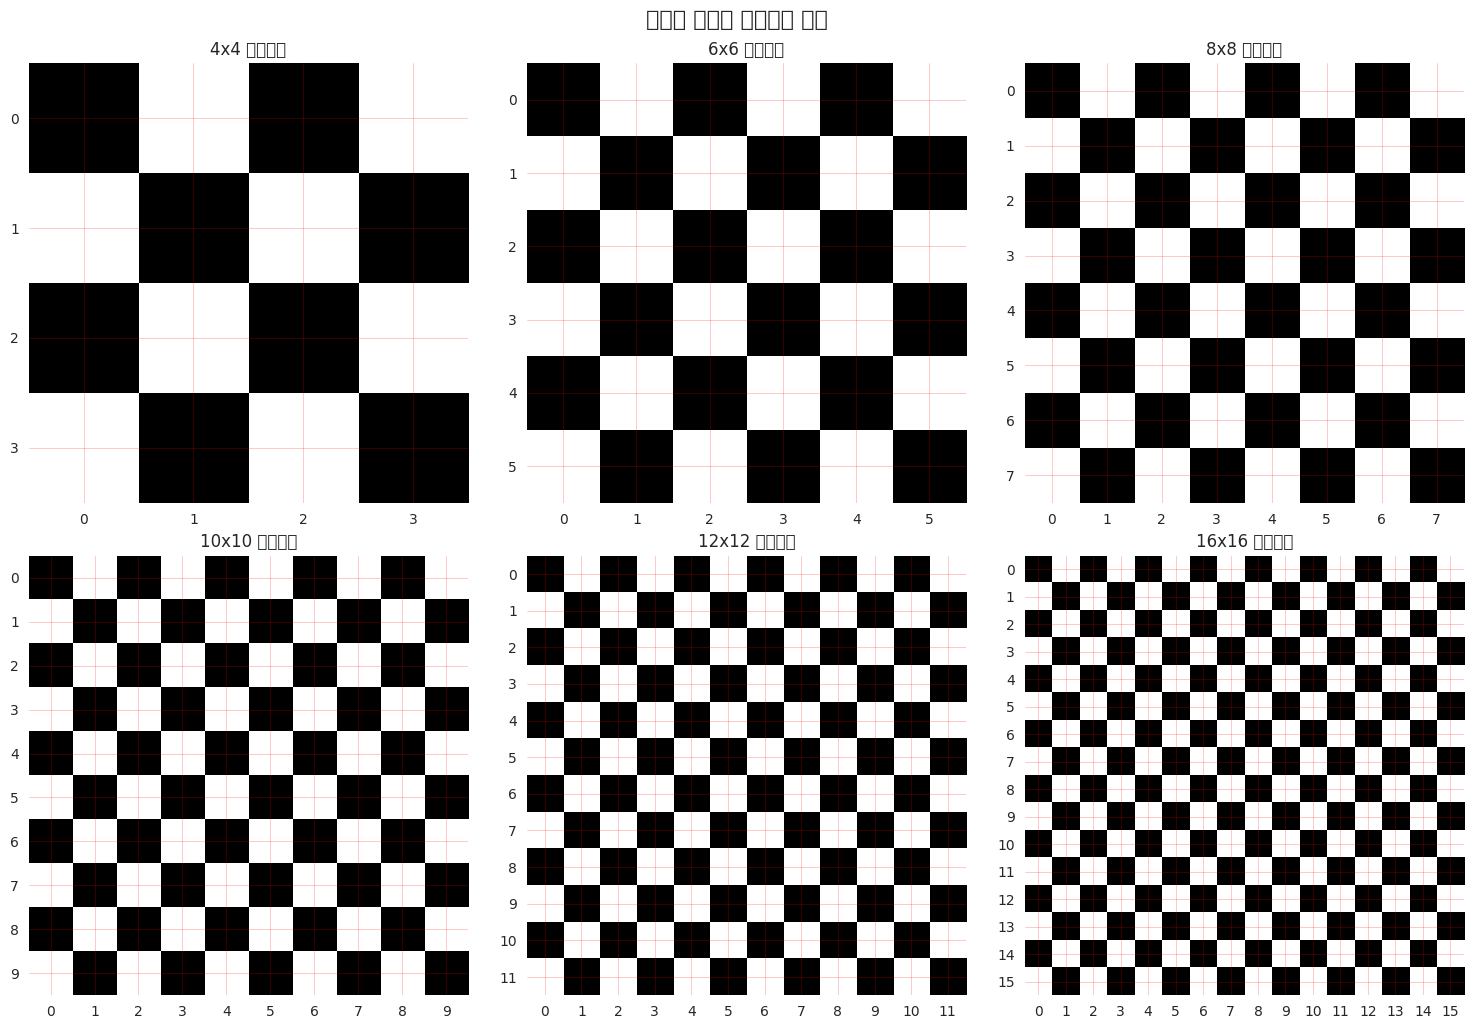

8x8 체스보드 배열:
[[0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]


In [52]:
def create_chessboard(size=8):
    """체스보드 패턴 생성"""
    chessboard = np.zeros((size, size))
    chessboard[1::2, ::2] = 1  # 홀수 행, 짝수 열
    chessboard[::2, 1::2] = 1  # 짝수 행, 홀수 열
    return chessboard

# 다양한 크기의 체스보드 생성
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sizes = [4, 6, 8, 10, 12, 16]

for i, size in enumerate(sizes):
    row, col = i // 3, i % 3
    chessboard = create_chessboard(size)
    
    # 체스보드 시각화
    im = axes[row, col].imshow(chessboard, cmap='gray', interpolation='nearest')
    axes[row, col].set_title(f'{size}x{size} 체스보드')
    axes[row, col].set_xticks(range(size))
    axes[row, col].set_yticks(range(size))
    axes[row, col].grid(True, color='red', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.suptitle('다양한 크기의 체스보드 패턴', fontsize=16, y=1.02)
plt.show()

# 배열 내부 구조 확인
print("8x8 체스보드 배열:")
print(create_chessboard(8))

#### 컬러 체스보드

/tmp/ipykernel_9250/119226212.py:52: UserWarning: Glyph 52972 (\N{HANGUL SYLLABLE KEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/119226212.py:52: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/119226212.py:52: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/119226212.py:52: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/119226212.py:52: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/119226212.py:52: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/119226212.py:52: UserWarning: Glyph 48744 (\N{HANGUL SYLLABLE BBAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

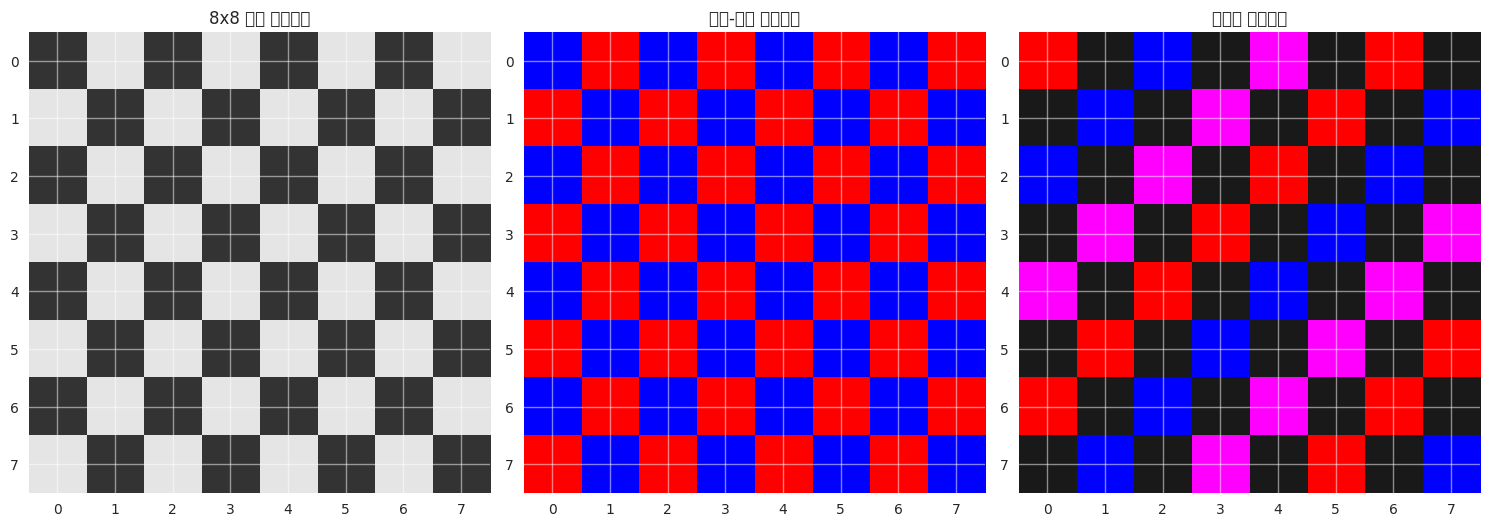

In [53]:
def create_colored_chessboard(size=8):
    """컬러 체스보드 생성 (RGB)"""
    # RGB 이미지를 위한 3차원 배열
    chessboard = np.zeros((size, size, 3))
    
    # 검은 칸: [0.2, 0.2, 0.2] (짙은 회색)
    # 흰 칸: [0.9, 0.9, 0.9] (밝은 회색)
    
    # 기본은 검은 칸
    chessboard[:, :] = [0.2, 0.2, 0.2]
    
    # 흰 칸 설정
    chessboard[1::2, ::2] = [0.9, 0.9, 0.9]
    chessboard[::2, 1::2] = [0.9, 0.9, 0.9]
    
    return chessboard

# 컬러 체스보드 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 기본 체스보드
chessboard_8x8 = create_colored_chessboard(8)
axes[0].imshow(chessboard_8x8)
axes[0].set_title('8x8 컬러 체스보드')
axes[0].grid(True, color='white', linewidth=1, alpha=0.5)

# 빨강-파랑 체스보드
red_blue_board = np.zeros((8, 8, 3))
red_blue_board[1::2, ::2] = [1, 0, 0]  # 빨강
red_blue_board[::2, 1::2] = [1, 0, 0]  # 빨강
red_blue_board[::2, ::2] = [0, 0, 1]   # 파랑
red_blue_board[1::2, 1::2] = [0, 0, 1] # 파랑

axes[1].imshow(red_blue_board)
axes[1].set_title('빨강-파랑 체스보드')
axes[1].grid(True, color='white', linewidth=1, alpha=0.5)

# 무지개 체스보드
rainbow_board = np.zeros((8, 8, 3))
colors = [[1,0,0], [0,1,0], [0,0,1], [1,1,0], [1,0,1], [0,1,1]]
for i in range(8):
    for j in range(8):
        if (i + j) % 2 == 0:
            rainbow_board[i, j] = colors[(i + j) % len(colors)]
        else:
            rainbow_board[i, j] = [0.1, 0.1, 0.1]

axes[2].imshow(rainbow_board)
axes[2].set_title('무지개 체스보드')
axes[2].grid(True, color='white', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()

## 🎭 2. 다양한 패턴 생성 및 시각화
### 기하학적 패턴들

/tmp/ipykernel_9250/3508990862.py:51: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/3508990862.py:51: UserWarning: Glyph 49900 (\N{HANGUL SYLLABLE SIM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/3508990862.py:51: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/3508990862.py:51: UserWarning: Glyph 55121 (\N{HANGUL SYLLABLE HEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/3508990862.py:51: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/3508990862.py:51: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/3508990862.py:51: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.tig

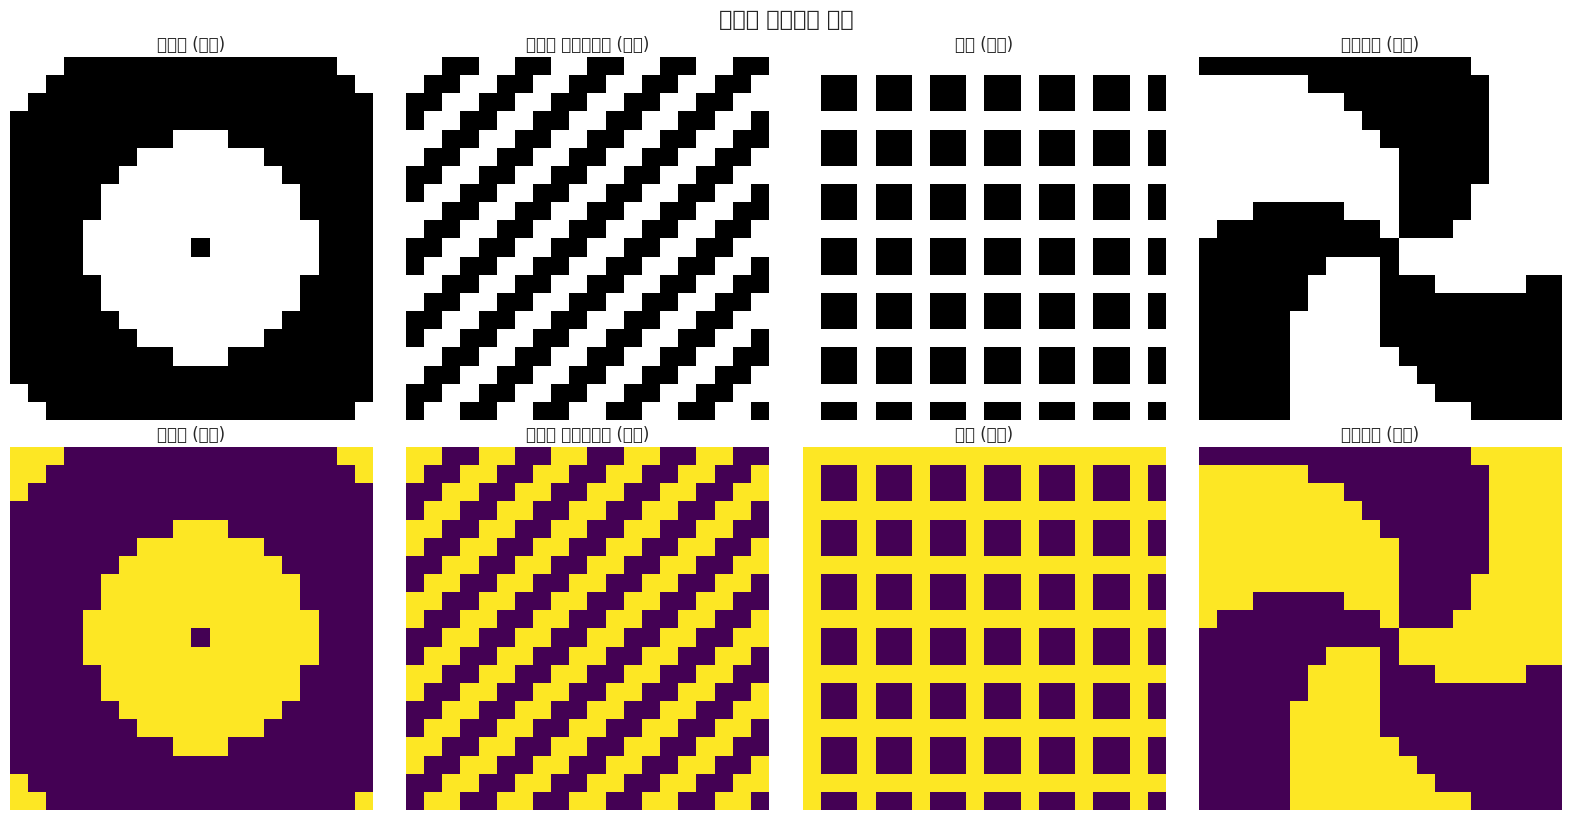

In [54]:
def create_patterns():
    """다양한 기하학적 패턴 생성"""
    size = 20
    
    # 1. 동심원 패턴
    center = size // 2
    y, x = np.ogrid[:size, :size]
    distances = np.sqrt((x - center)**2 + (y - center)**2)
    circles = np.sin(distances * 0.5) > 0
    
    # 2. 대각선 스트라이프
    diagonal_stripes = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            diagonal_stripes[i, j] = (i + j) % 4 < 2
    
    # 3. 격자 패턴
    grid_pattern = np.zeros((size, size))
    grid_pattern[::3, :] = 1
    grid_pattern[:, ::3] = 1
    
    # 4. 스파이럴 패턴
    spiral = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            angle = np.arctan2(i - center, j - center)
            radius = np.sqrt((i - center)**2 + (j - center)**2)
            spiral[i, j] = np.sin(angle * 3 + radius * 0.3) > 0
    
    return circles, diagonal_stripes, grid_pattern, spiral

# 패턴 생성 및 시각화
patterns = create_patterns()
pattern_names = ['동심원', '대각선 스트라이프', '격자', '스파이럴']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, (pattern, name) in enumerate(zip(patterns, pattern_names)):
    # 흑백 버전
    axes[0, i].imshow(pattern, cmap='gray')
    axes[0, i].set_title(f'{name} (흑백)')
    axes[0, i].axis('off')
    
    # 컬러 버전
    colored_pattern = plt.cm.viridis(pattern.astype(float))
    axes[1, i].imshow(colored_pattern)
    axes[1, i].set_title(f'{name} (컬러)')
    axes[1, i].axis('off')

plt.tight_layout()
plt.suptitle('다양한 기하학적 패턴', fontsize=16, y=1.02)
plt.show()

#### 3D 시각화

/tmp/ipykernel_9250/3500680644.py:42: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/3500680644.py:42: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/3500680644.py:42: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/3500680644.py:42: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/3500680644.py:42: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/3500680644.py:42: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/3500680644.py:42: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

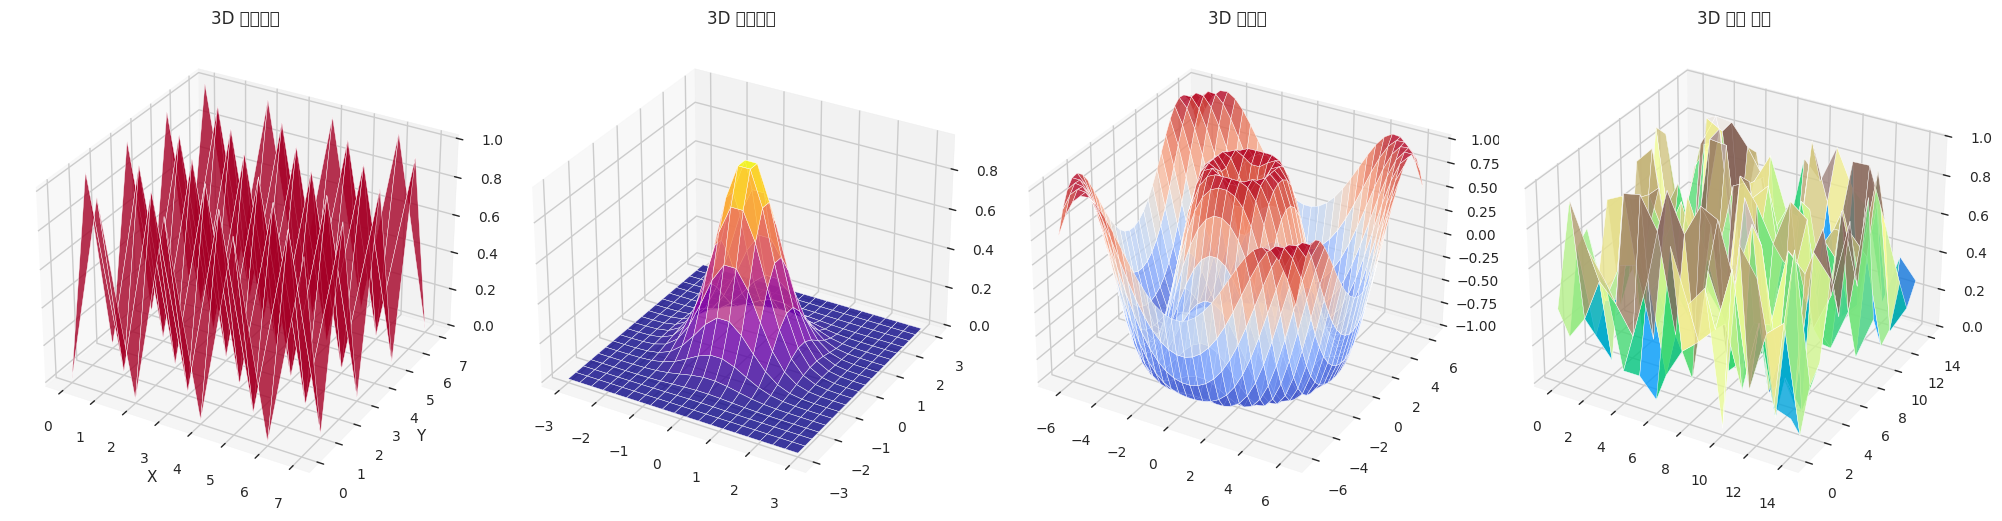

In [55]:
def visualize_3d_patterns():
    """3D로 패턴 시각화"""
    fig = plt.figure(figsize=(20, 5))
    
    # 1. 3D 체스보드
    ax1 = fig.add_subplot(141, projection='3d')
    chessboard = create_chessboard(8)
    x, y = np.meshgrid(range(8), range(8))
    ax1.plot_surface(x, y, chessboard, cmap='RdYlBu', alpha=0.8)
    ax1.set_title('3D 체스보드')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('값')
    
    # 2. 3D 가우시안 분포
    ax2 = fig.add_subplot(142, projection='3d')
    size = 20
    x = np.linspace(-3, 3, size)
    y = np.linspace(-3, 3, size)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-(X**2 + Y**2))
    ax2.plot_surface(X, Y, Z, cmap='plasma', alpha=0.8)
    ax2.set_title('3D 가우시안')
    
    # 3. 3D 사인파
    ax3 = fig.add_subplot(143, projection='3d')
    x = np.linspace(-2*np.pi, 2*np.pi, 30)
    y = np.linspace(-2*np.pi, 2*np.pi, 30)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2))
    ax3.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8)
    ax3.set_title('3D 사인파')
    
    # 4. 3D 랜덤 표면
    ax4 = fig.add_subplot(144, projection='3d')
    np.random.seed(42)
    random_surface = np.random.random((15, 15))
    x, y = np.meshgrid(range(15), range(15))
    ax4.plot_surface(x, y, random_surface, cmap='terrain', alpha=0.8)
    ax4.set_title('3D 랜덤 표면')
    
    plt.tight_layout()
    plt.show()

visualize_3d_patterns()

### 🌈 3. 그라디언트와 색상 패턴
#### 색상 그라디언트

/tmp/ipykernel_9250/1495093154.py:45: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1495093154.py:45: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1495093154.py:45: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1495093154.py:45: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1495093154.py:45: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1495093154.py:45: UserWarning: Glyph 50616 (\N{HANGUL SYLLABLE EON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1495093154.py:45: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_l

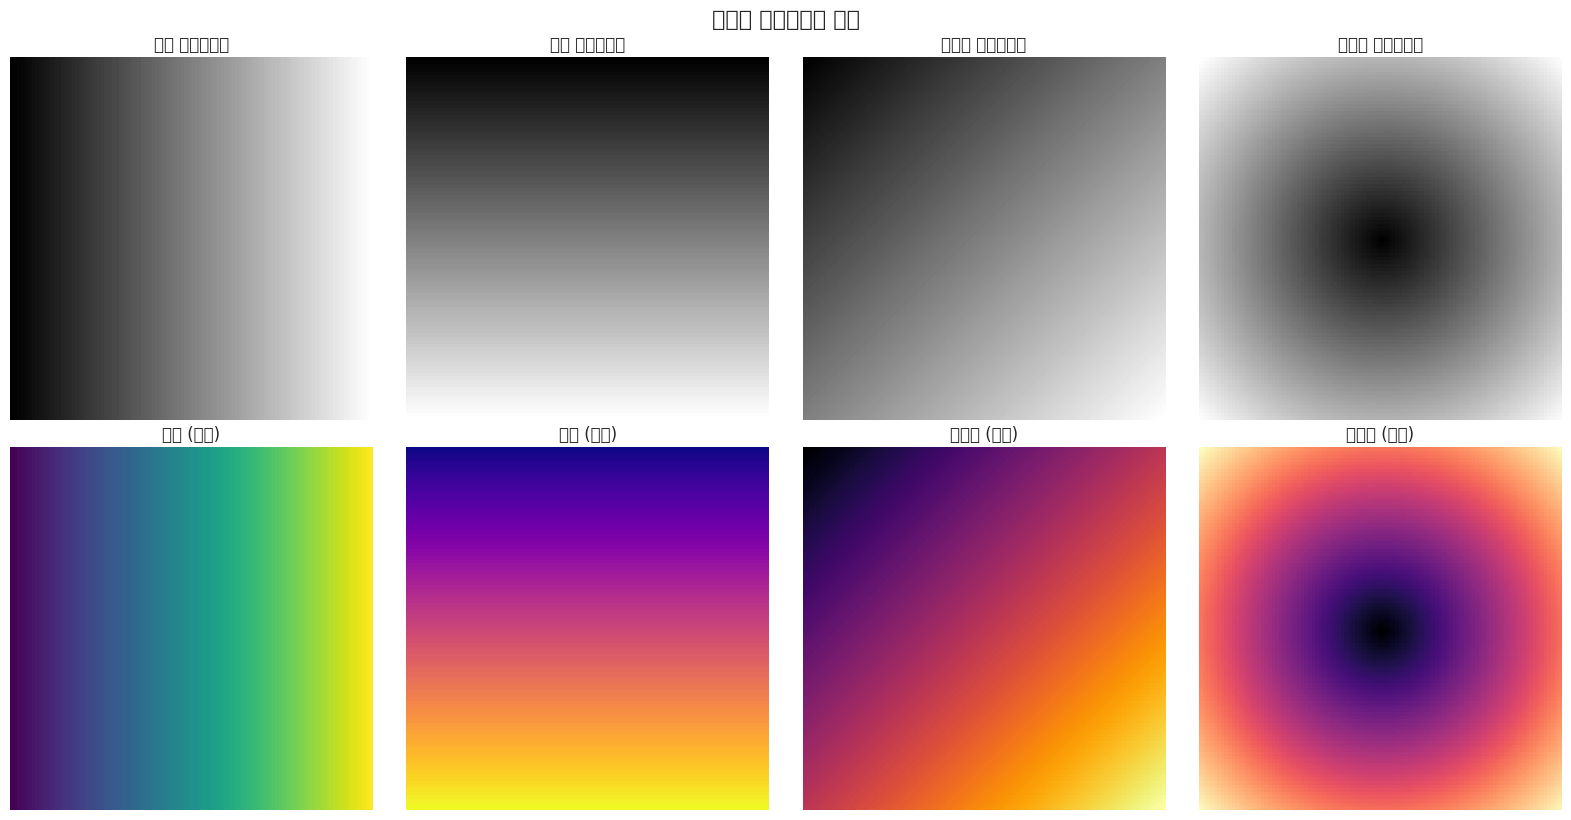

In [56]:
def create_gradients():
    """다양한 그라디언트 패턴 생성"""
    size = 100
    
    # 1. 수평 그라디언트
    horizontal = np.linspace(0, 1, size)
    horizontal_gradient = np.tile(horizontal, (size, 1))
    
    # 2. 수직 그라디언트
    vertical = np.linspace(0, 1, size)
    vertical_gradient = np.tile(vertical.reshape(-1, 1), (1, size))
    
    # 3. 대각선 그라디언트
    x, y = np.meshgrid(np.linspace(0, 1, size), np.linspace(0, 1, size))
    diagonal_gradient = (x + y) / 2
    
    # 4. 방사형 그라디언트
    center = size // 2
    y, x = np.ogrid[:size, :size]
    distances = np.sqrt((x - center)**2 + (y - center)**2)
    radial_gradient = distances / distances.max()
    
    return horizontal_gradient, vertical_gradient, diagonal_gradient, radial_gradient

# 그라디언트 시각화
gradients = create_gradients()
gradient_names = ['수평', '수직', '대각선', '방사형']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# 다양한 컬러맵으로 시각화
colormaps = ['viridis', 'plasma', 'inferno', 'magma']

for i, (gradient, name) in enumerate(zip(gradients, gradient_names)):
    # 기본 그라디언트
    axes[0, i].imshow(gradient, cmap='gray')
    axes[0, i].set_title(f'{name} 그라디언트')
    axes[0, i].axis('off')
    
    # 컬러 그라디언트
    axes[1, i].imshow(gradient, cmap=colormaps[i])
    axes[1, i].set_title(f'{name} (컬러)')
    axes[1, i].axis('off')

plt.tight_layout()
plt.suptitle('다양한 그라디언트 패턴', fontsize=16, y=1.02)
plt.show()

#### RGB 색상 조합

/tmp/ipykernel_9250/1908836119.py:85: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1908836119.py:85: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1908836119.py:85: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1908836119.py:85: UserWarning: Glyph 45328 (\N{HANGUL SYLLABLE NEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1908836119.py:85: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1908836119.py:85: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1908836119.py:85: UserWarning: Glyph 55072 (\N{HANGUL SYLLABLE HWIL}) missing from font(s) DejaVu Sans.
  plt.tigh

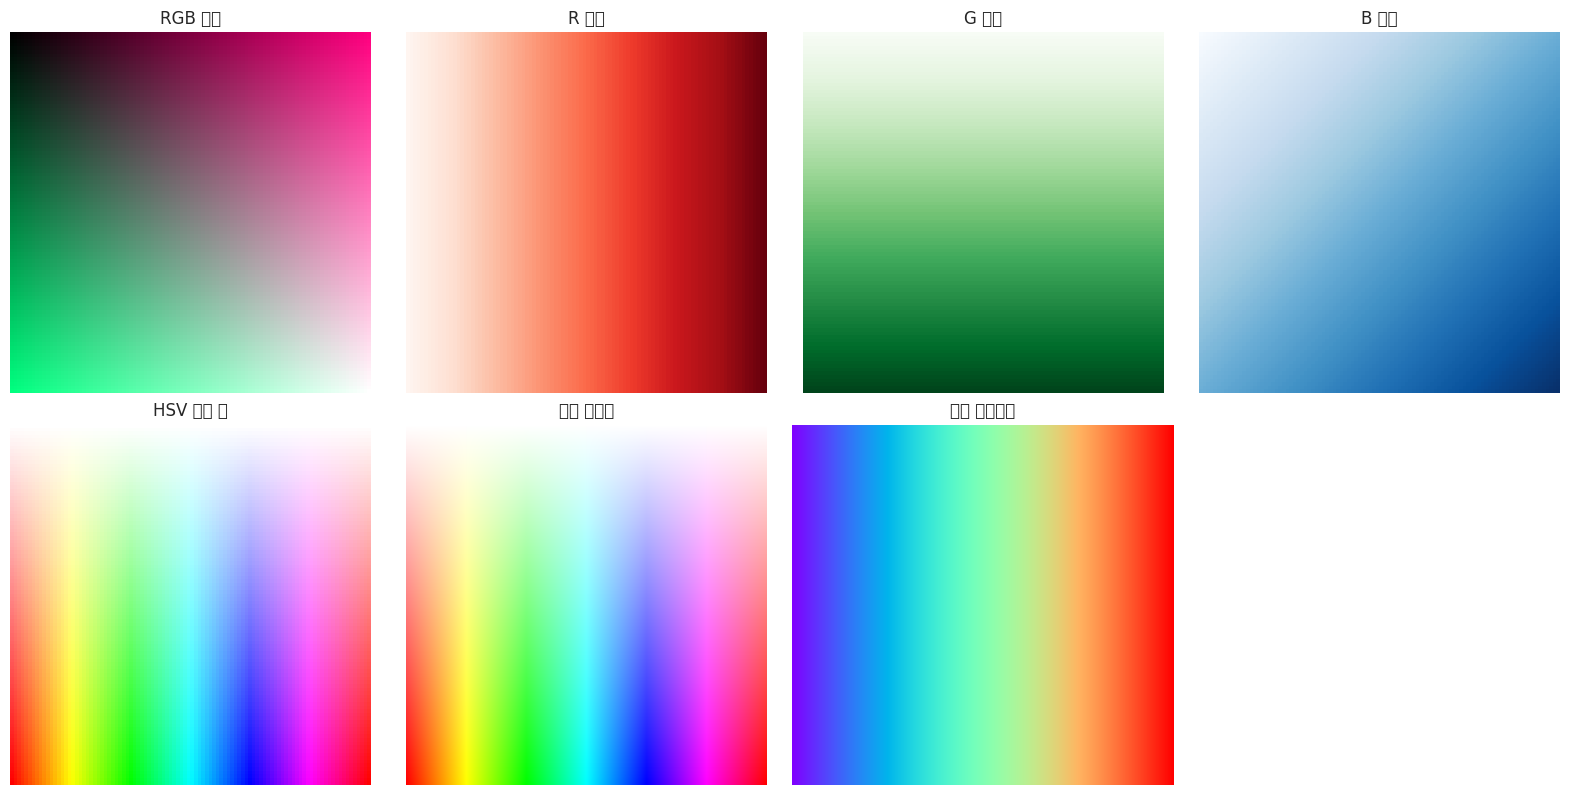

In [57]:
def create_rgb_patterns():
    """RGB 채널별 패턴 생성"""
    size = 100
    
    # RGB 이미지 생성
    rgb_image = np.zeros((size, size, 3))
    
    # R 채널: 수평 그라디언트
    rgb_image[:, :, 0] = np.linspace(0, 1, size)
    
    # G 채널: 수직 그라디언트
    rgb_image[:, :, 1] = np.linspace(0, 1, size).reshape(-1, 1)
    
    # B 채널: 대각선 그라디언트
    x, y = np.meshgrid(np.linspace(0, 1, size), np.linspace(0, 1, size))
    rgb_image[:, :, 2] = (x + y) / 2
    
    return rgb_image

# RGB 패턴 시각화
rgb_pattern = create_rgb_patterns()

# 수정: 2x4로 서브플롯 크기 변경하거나 레이아웃 조정
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2x4로 변경

# 전체 RGB 이미지
axes[0, 0].imshow(rgb_pattern)
axes[0, 0].set_title('RGB 조합')
axes[0, 0].axis('off')

# 각 채널별 시각화
channels = ['R', 'G', 'B']
colors = ['Reds', 'Greens', 'Blues']

for i in range(3):
    axes[0, i+1].imshow(rgb_pattern[:, :, i], cmap=colors[i])
    axes[0, i+1].set_title(f'{channels[i]} 채널')
    axes[0, i+1].axis('off')

# HSV 색상 공간
from matplotlib.colors import hsv_to_rgb

# HSV 색상 휠
h = np.linspace(0, 1, 100)
s = np.linspace(0, 1, 100)
H, S = np.meshgrid(h, s)
V = np.ones_like(H)
hsv = np.stack([H, S, V], axis=2)
rgb_from_hsv = hsv_to_rgb(hsv)

axes[1, 0].imshow(rgb_from_hsv)
axes[1, 0].set_title('HSV 색상 휠')
axes[1, 0].axis('off')

# 색상환
angles = np.linspace(0, 2*np.pi, 360)
radius = np.linspace(0, 1, 100)
A, R = np.meshgrid(angles, radius)

# 극좌표를 직교좌표로 변환
X = R * np.cos(A)
Y = R * np.sin(A)

# 색상 매핑
H_wheel = A / (2 * np.pi)
S_wheel = R
V_wheel = np.ones_like(H_wheel)
hsv_wheel = np.stack([H_wheel, S_wheel, V_wheel], axis=2)
rgb_wheel = hsv_to_rgb(hsv_wheel)

axes[1, 1].imshow(rgb_wheel, extent=[-1, 1, -1, 1])
axes[1, 1].set_title('원형 색상환')
axes[1, 1].axis('off')

# 색상 스펙트럼
spectrum = np.linspace(0, 1, 256).reshape(1, -1)
spectrum_rgb = plt.cm.rainbow(spectrum)
axes[1, 2].imshow(spectrum_rgb, aspect='auto')
axes[1, 2].set_title('색상 스펙트럼')
axes[1, 2].axis('off')

# 빈 subplot 숨기기
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

### 🔢 4. 수학적 함수 시각화
#### 삼각함수 패턴

/tmp/ipykernel_9250/1463000164.py:32: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1463000164.py:32: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1463000164.py:32: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1463000164.py:32: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1463000164.py:32: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1463000164.py:32: UserWarning: Glyph 49453 (\N{HANGUL SYLLABLE SEOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1463000164.py:32: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layou

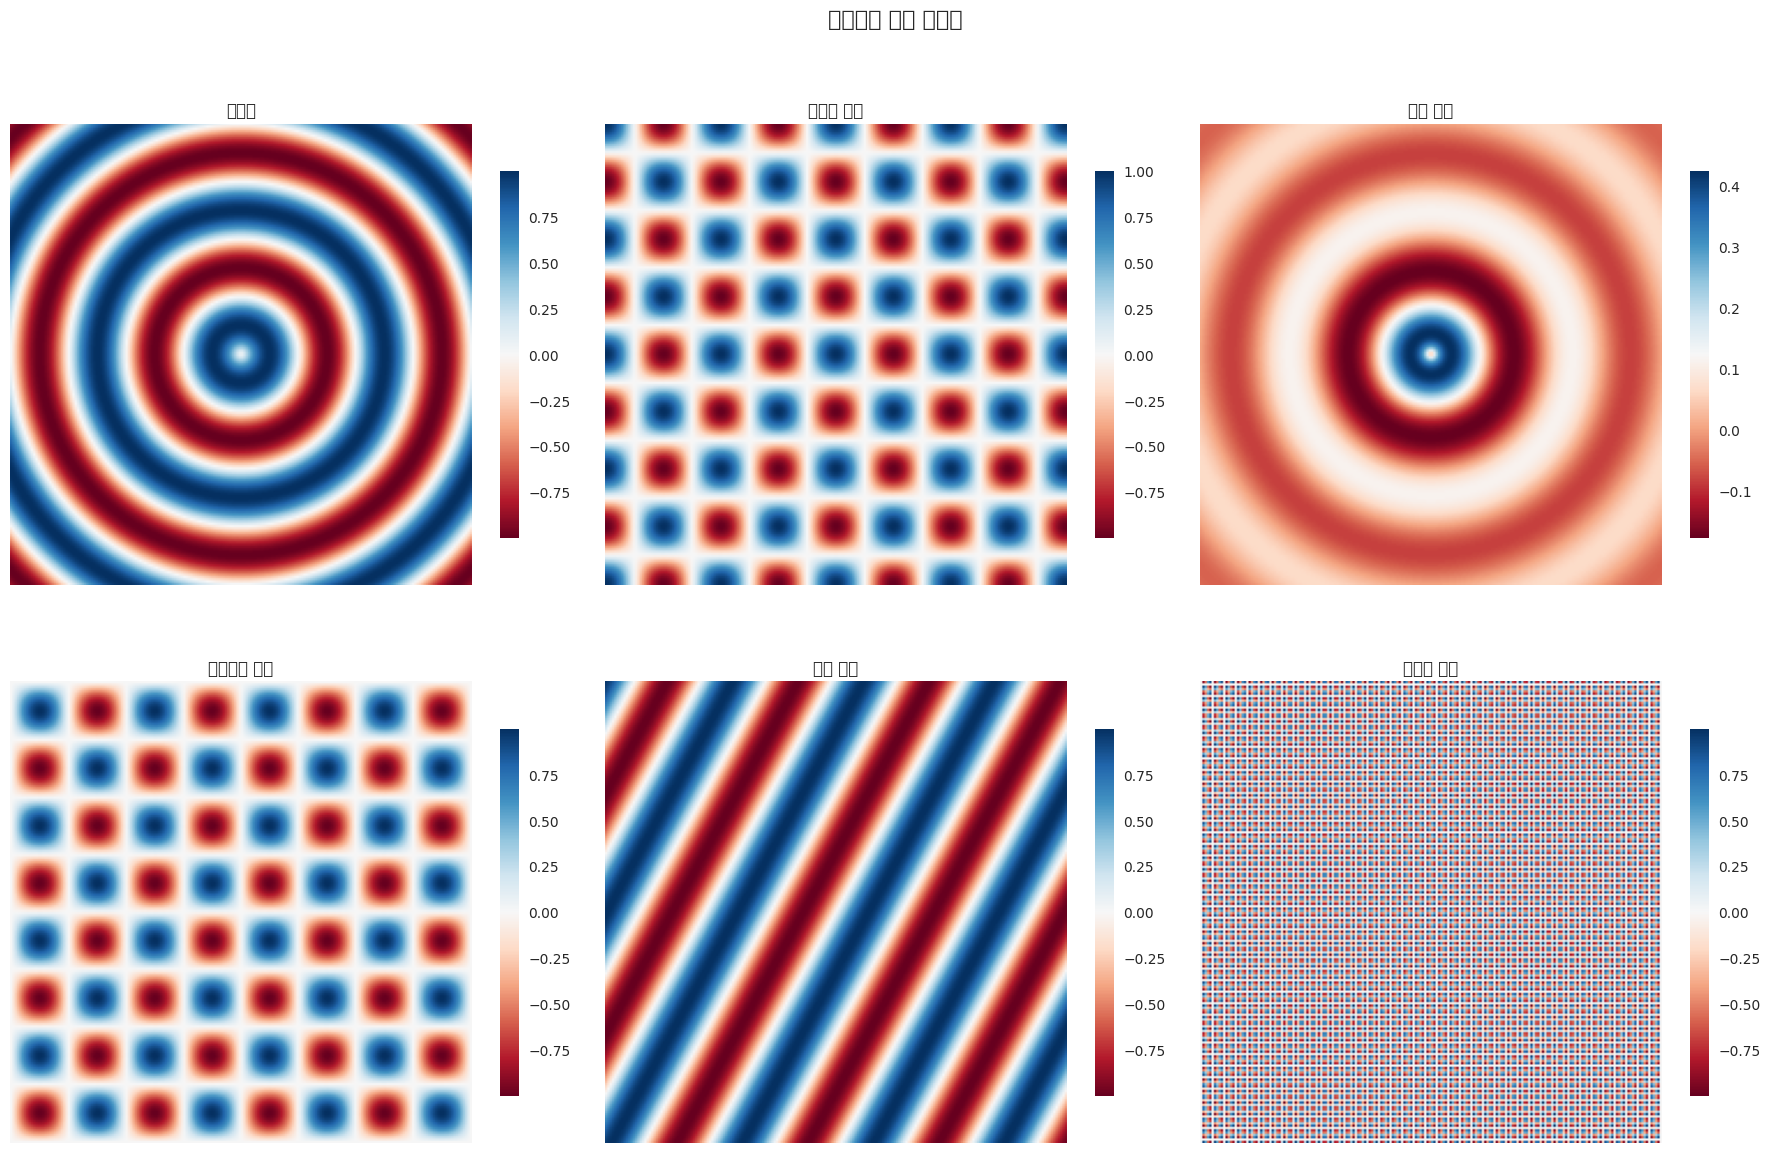

In [58]:
def create_wave_patterns():
    """삼각함수 기반 패턴 생성"""
    size = 200
    x = np.linspace(-4*np.pi, 4*np.pi, size)
    y = np.linspace(-4*np.pi, 4*np.pi, size)
    X, Y = np.meshgrid(x, y)
    
    # 다양한 파동 패턴
    patterns = {
        '사인파': np.sin(np.sqrt(X**2 + Y**2)),
        '코사인 간섭': np.cos(X) * np.cos(Y),
        '리플 효과': np.sin(np.sqrt(X**2 + Y**2)) / (np.sqrt(X**2 + Y**2) + 1),
        '체커보드 사인': np.sin(X) * np.sin(Y),
        '회전 파동': np.sin(X * np.cos(0.5) + Y * np.sin(0.5)),
        '모아레 패턴': np.sin(10*X) * np.sin(10.1*Y)
    }
    
    return patterns, X, Y

# 파동 패턴 시각화
patterns, X, Y = create_wave_patterns()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (name, pattern) in enumerate(patterns.items()):
    im = axes[i].imshow(pattern, cmap='RdBu', extent=[-4*np.pi, 4*np.pi, -4*np.pi, 4*np.pi])
    axes[i].set_title(name)
    axes[i].axis('off')
    plt.colorbar(im, ax=axes[i], shrink=0.6)

plt.tight_layout()
plt.suptitle('삼각함수 기반 패턴들', fontsize=16, y=1.02)
plt.show()

#### 프랙탈 패턴

/tmp/ipykernel_9250/1888434094.py:65: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1888434094.py:65: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1888434094.py:65: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1888434094.py:65: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1888434094.py:65: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1888434094.py:65: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1888434094.py:65: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  plt.tight_la

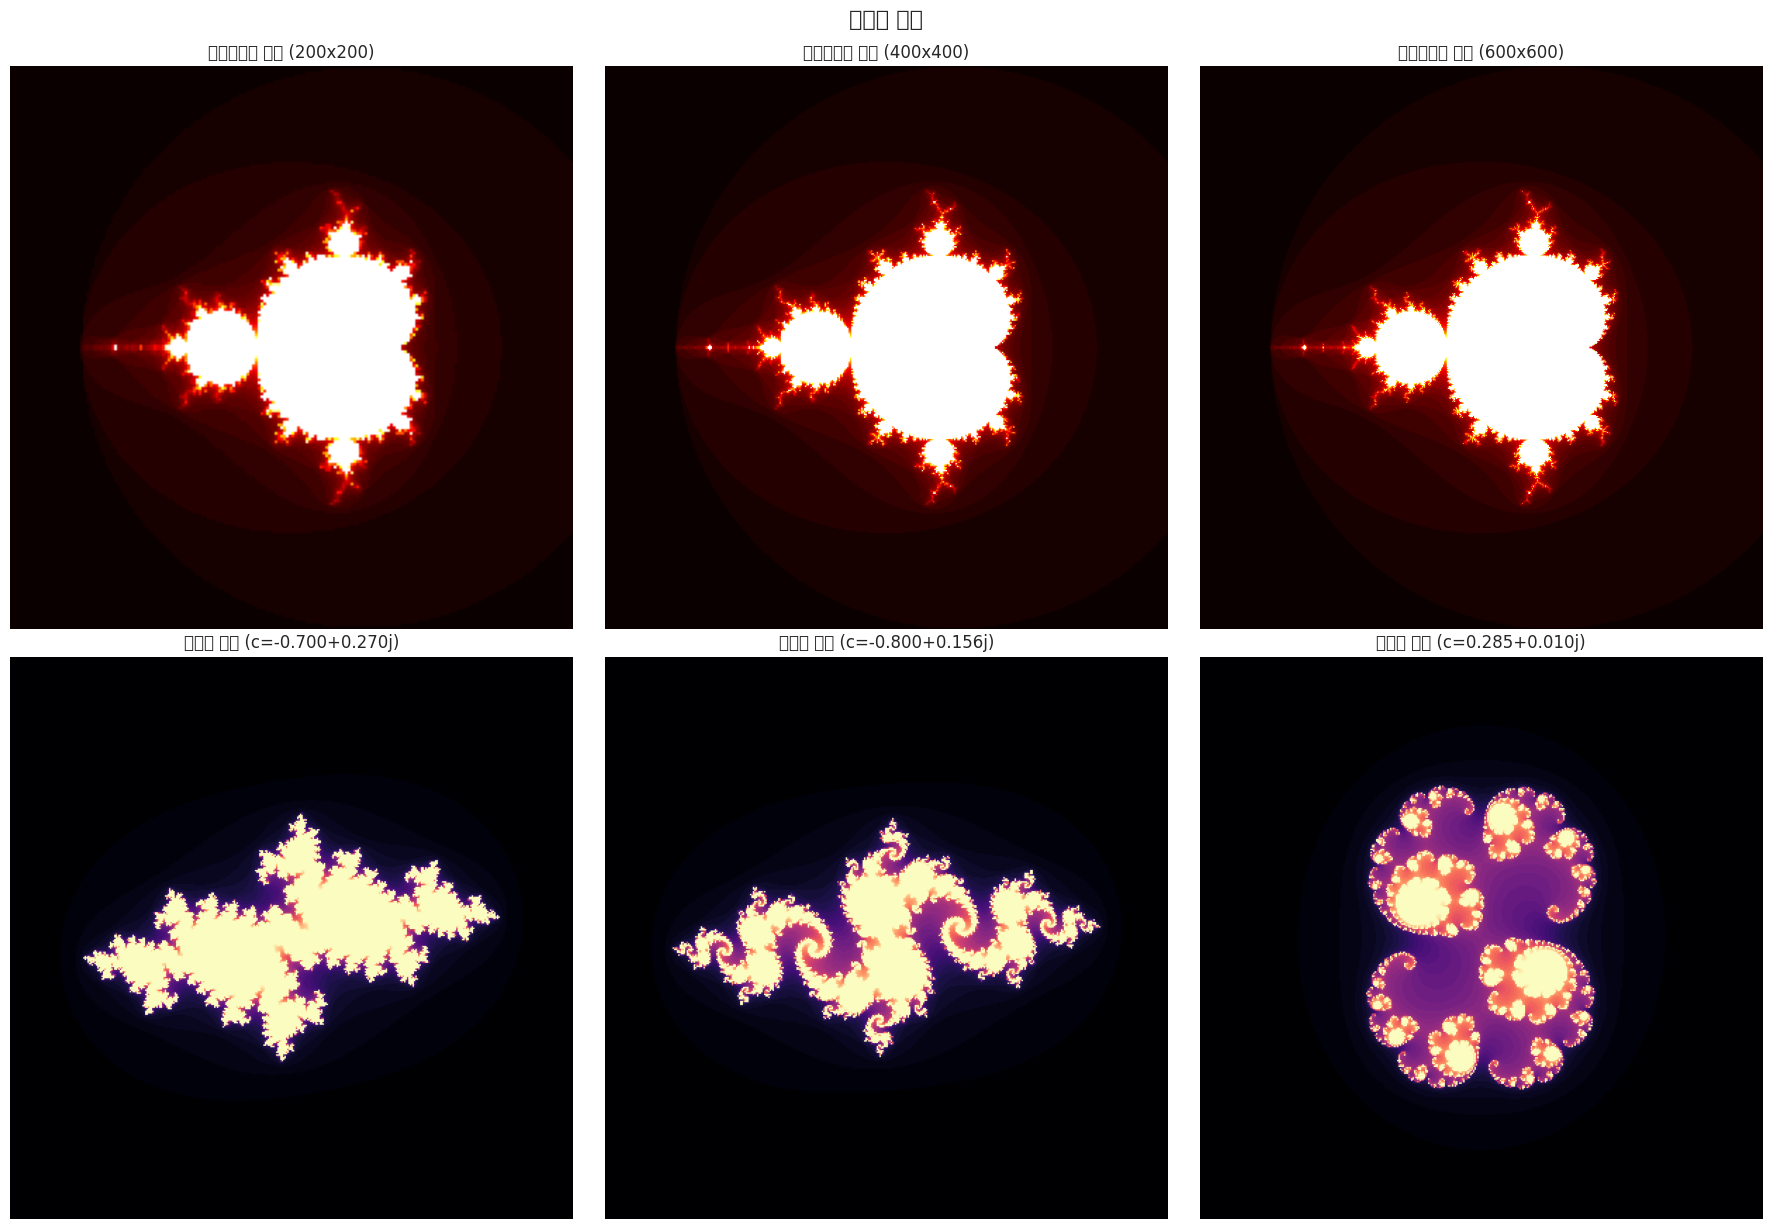

In [59]:
def mandelbrot_set(width, height, max_iter=100):
    """만델브로트 집합 생성"""
    # 복소평면 설정
    x_min, x_max = -2.5, 1.5
    y_min, y_max = -2, 2
    
    # 좌표 생성
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y
    
    # 만델브로트 계산
    Z = np.zeros_like(C)
    iterations = np.zeros(C.shape, dtype=int)
    
    for i in range(max_iter):
        mask = np.abs(Z) <= 2
        Z[mask] = Z[mask]**2 + C[mask]
        iterations[mask] = i
    
    return iterations

def julia_set(width, height, c=-0.7 + 0.27015j, max_iter=100):
    """줄리아 집합 생성"""
    # 복소평면 설정
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    
    # 좌표 생성
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    
    # 줄리아 계산
    iterations = np.zeros(Z.shape, dtype=int)
    
    for i in range(max_iter):
        mask = np.abs(Z) <= 2
        Z[mask] = Z[mask]**2 + c
        iterations[mask] = i
    
    return iterations

# 프랙탈 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 만델브로트 집합 (다양한 해상도)
resolutions = [200, 400, 600]
for i, res in enumerate(resolutions):
    mandelbrot = mandelbrot_set(res, res, max_iter=50)
    im = axes[0, i].imshow(mandelbrot, cmap='hot', extent=[-2.5, 1.5, -2, 2])
    axes[0, i].set_title(f'만델브로트 집합 ({res}x{res})')
    axes[0, i].axis('off')

# 줄리아 집합 (다양한 매개변수)
julia_params = [-0.7 + 0.27015j, -0.8 + 0.156j, 0.285 + 0.01j]
for i, c in enumerate(julia_params):
    julia = julia_set(400, 400, c, max_iter=50)
    im = axes[1, i].imshow(julia, cmap='magma', extent=[-2, 2, -2, 2])
    axes[1, i].set_title(f'줄리아 집합 (c={c:.3f})')
    axes[1, i].axis('off')

plt.tight_layout()
plt.suptitle('프랙탈 패턴', fontsize=16, y=1.02)
plt.show()

### 📊 5. 데이터 시각화
#### 랜덤 데이터 분포

/tmp/ipykernel_9250/259484969.py:37: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/259484969.py:37: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/259484969.py:37: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/259484969.py:37: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/259484969.py:37: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/259484969.py:37: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/259484969.py:37: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layou

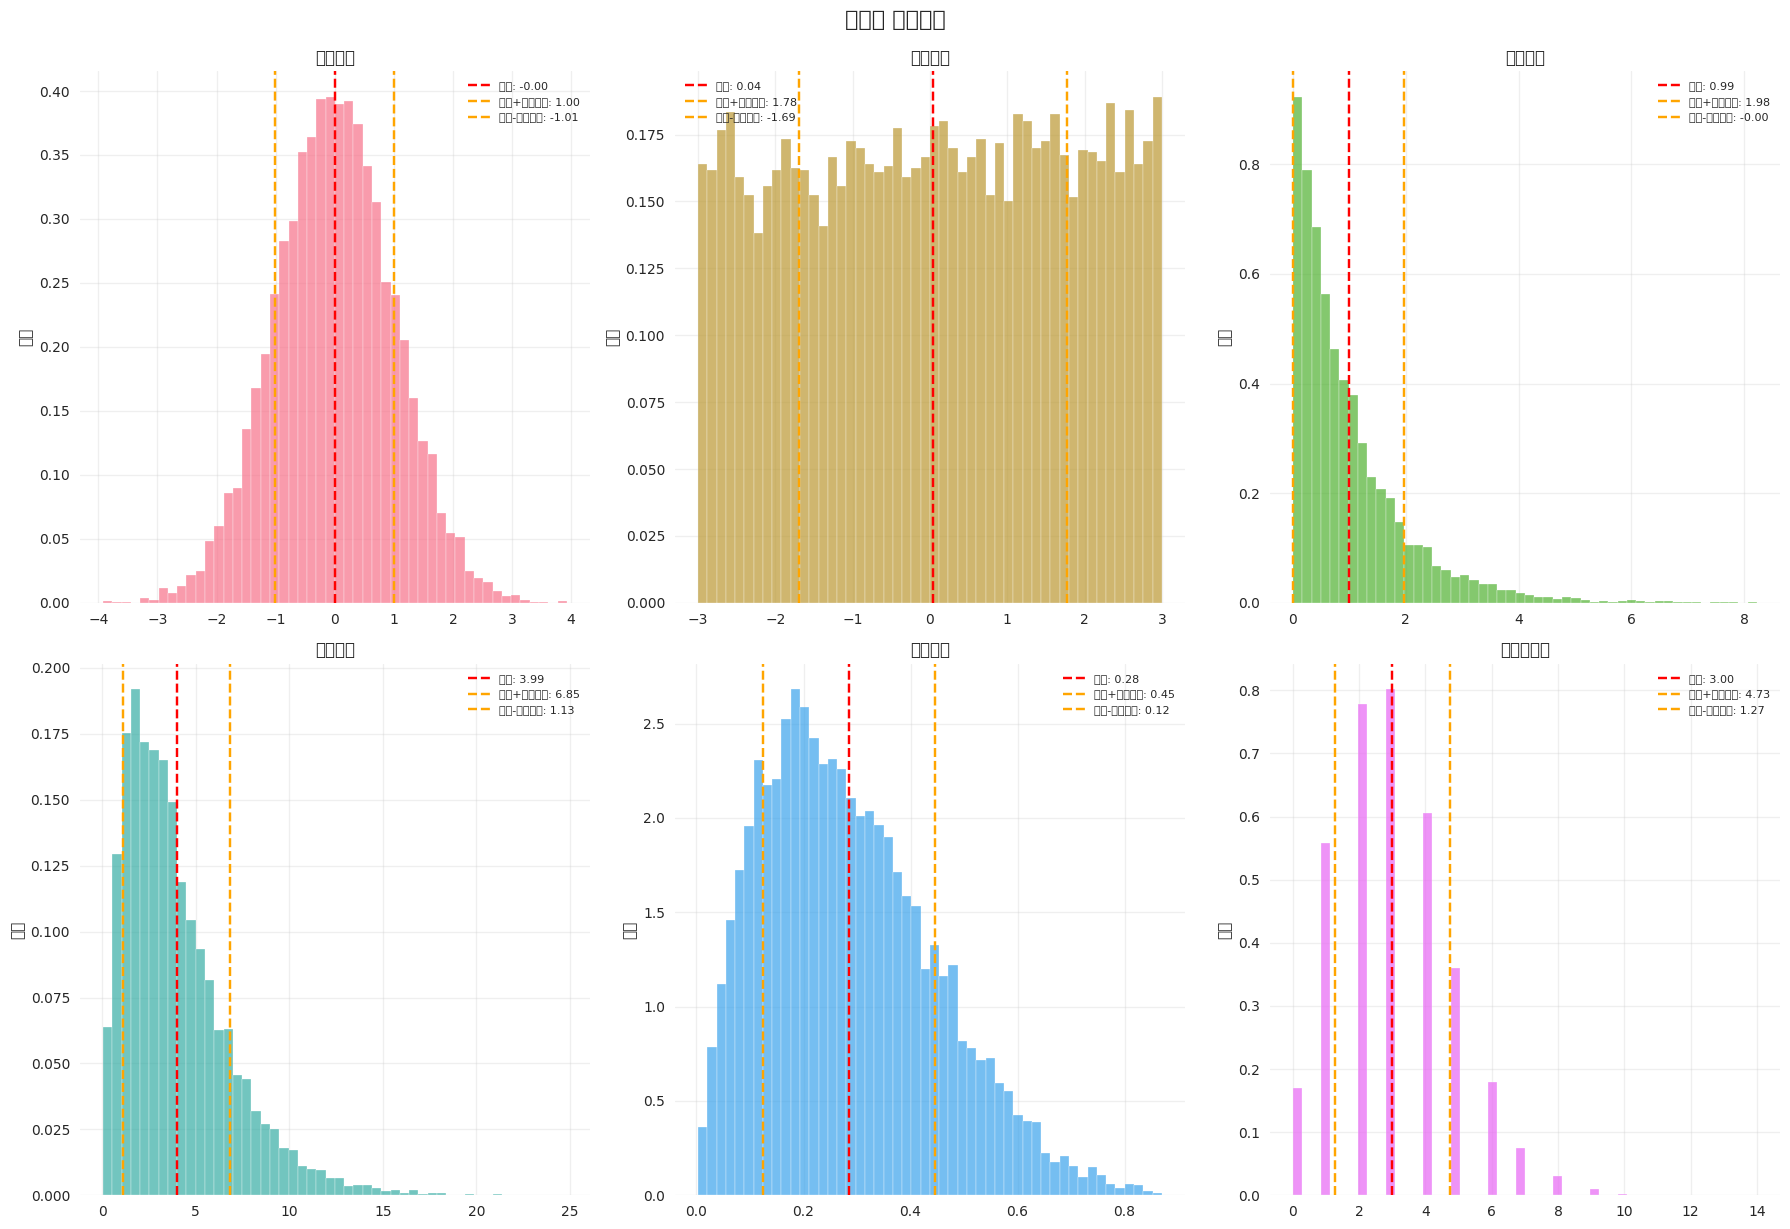

In [60]:
def visualize_random_distributions():
    """다양한 확률분포 시각화"""
    np.random.seed(42)
    n_samples = 10000
    
    # 다양한 분포 생성
    distributions = {
        '정규분포': np.random.normal(0, 1, n_samples),
        '균등분포': np.random.uniform(-3, 3, n_samples),
        '지수분포': np.random.exponential(1, n_samples),
        '감마분포': np.random.gamma(2, 2, n_samples),
        '베타분포': np.random.beta(2, 5, n_samples),
        '포아송분포': np.random.poisson(3, n_samples)
    }
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, (name, data) in enumerate(distributions.items()):
        # 히스토그램
        axes[i].hist(data, bins=50, alpha=0.7, density=True, color=f'C{i}')
        axes[i].set_title(f'{name}')
        axes[i].set_ylabel('밀도')
        axes[i].grid(True, alpha=0.3)
        
        # 통계량 표시
        mean = np.mean(data)
        std = np.std(data)
        axes[i].axvline(mean, color='red', linestyle='--', 
                       label=f'평균: {mean:.2f}')
        axes[i].axvline(mean + std, color='orange', linestyle='--', 
                       label=f'평균+표준편차: {mean+std:.2f}')
        axes[i].axvline(mean - std, color='orange', linestyle='--', 
                       label=f'평균-표준편차: {mean-std:.2f}')
        axes[i].legend(fontsize=8)
    
    plt.tight_layout()
    plt.suptitle('다양한 확률분포', fontsize=16, y=1.02)
    plt.show()

visualize_random_distributions()

#### 2D 히트맵

/tmp/ipykernel_9250/2012388673.py:59: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/2012388673.py:59: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/2012388673.py:59: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/2012388673.py:59: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/2012388673.py:59: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/2012388673.py:59: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/2012388673.py:59: UserWarning: Glyph 47148 (\N{HANGUL SYLLABLE RYEOL}) missing from font(s) DejaVu Sans.
  plt.

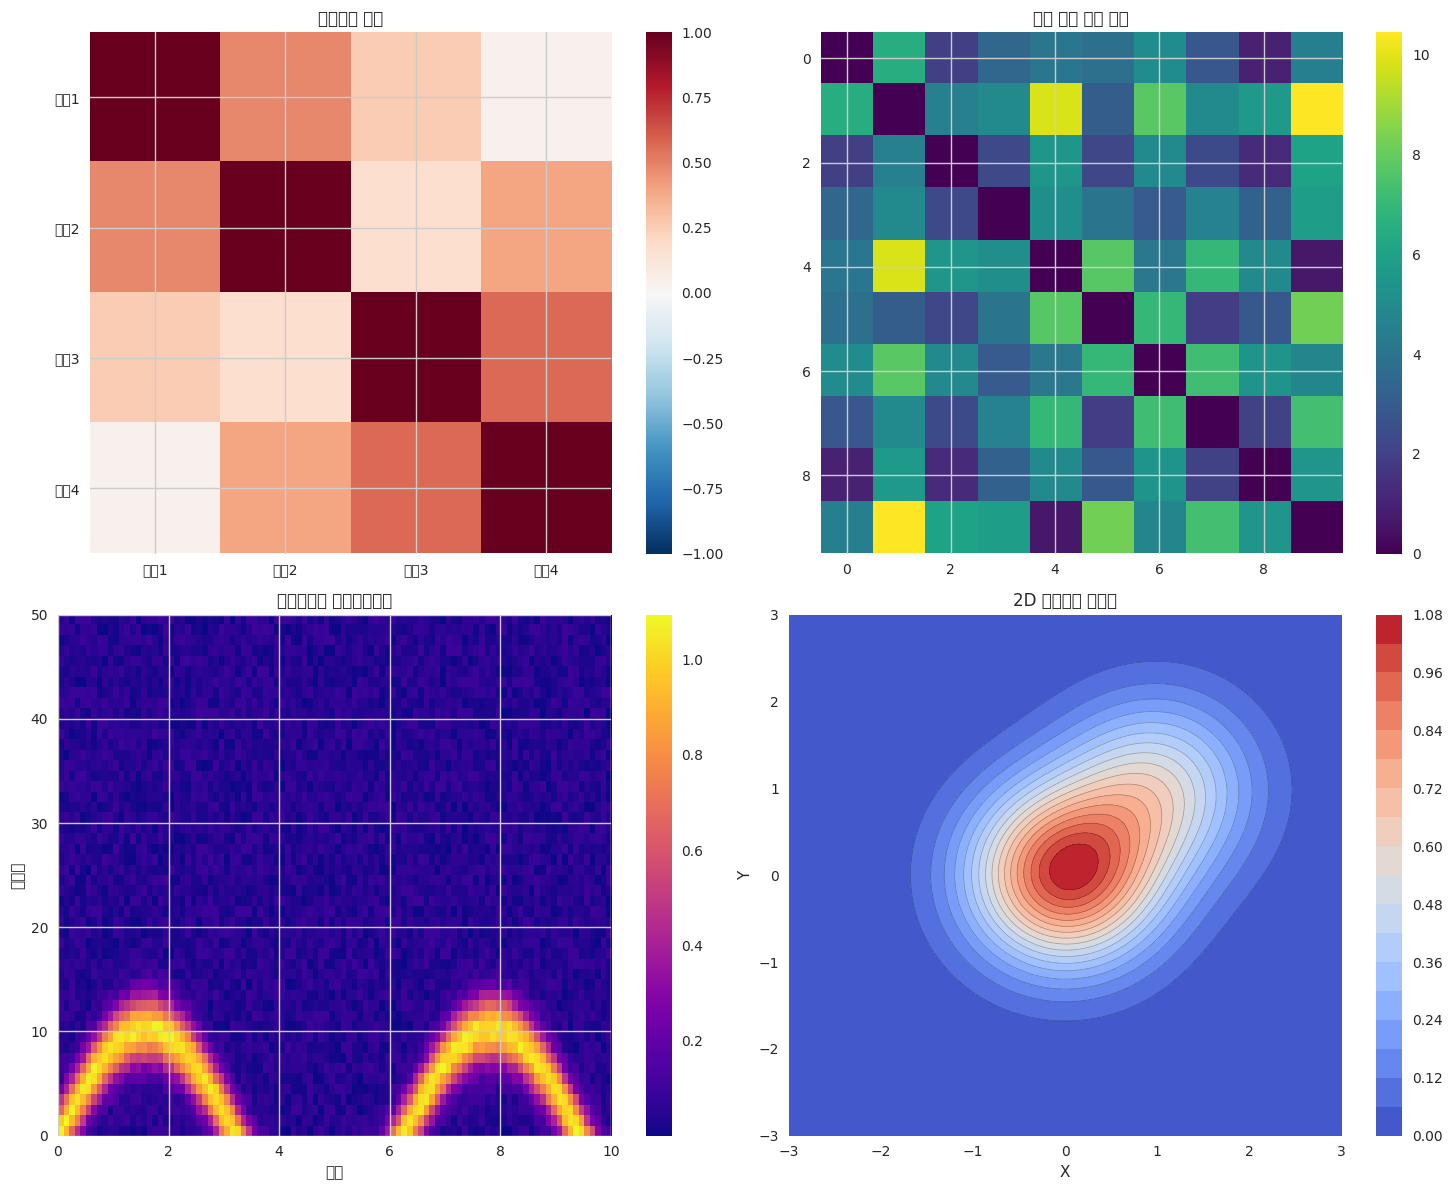

In [61]:
def create_heatmaps():
    """다양한 히트맵 생성"""
    # 1. 상관관계 행렬
    np.random.seed(42)
    data = np.random.multivariate_normal([0, 0, 0, 0], 
                                       [[1, 0.5, 0.3, 0.1],
                                        [0.5, 1, 0.2, 0.4],
                                        [0.3, 0.2, 1, 0.6],
                                        [0.1, 0.4, 0.6, 1]], 1000)
    corr_matrix = np.corrcoef(data.T)
    
    # 2. 거리 행렬
    points = np.random.random((10, 2)) * 10
    distances = np.sqrt(((points[:, np.newaxis] - points[np.newaxis, :])**2).sum(axis=2))
    
    # 3. 시간-주파수 스펙트로그램 시뮬레이션
    time = np.linspace(0, 10, 100)
    frequencies = np.linspace(0, 50, 50)
    T, F = np.meshgrid(time, frequencies)
    spectrogram = np.exp(-(F - 10*np.sin(T))**2 / 10) + np.random.random((50, 100)) * 0.1
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 상관관계 행렬
    im1 = axes[0, 0].imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
    axes[0, 0].set_title('상관관계 행렬')
    axes[0, 0].set_xticks(range(4))
    axes[0, 0].set_yticks(range(4))
    axes[0, 0].set_xticklabels(['변수1', '변수2', '변수3', '변수4'])
    axes[0, 0].set_yticklabels(['변수1', '변수2', '변수3', '변수4'])
    plt.colorbar(im1, ax=axes[0, 0])
    
    # 거리 행렬
    im2 = axes[0, 1].imshow(distances, cmap='viridis')
    axes[0, 1].set_title('점들 간의 거리 행렬')
    plt.colorbar(im2, ax=axes[0, 1])
    
    # 스펙트로그램
    im3 = axes[1, 0].imshow(spectrogram, cmap='plasma', aspect='auto', 
                           extent=[0, 10, 0, 50], origin='lower')
    axes[1, 0].set_title('시뮬레이션 스펙트로그램')
    axes[1, 0].set_xlabel('시간')
    axes[1, 0].set_ylabel('주파수')
    plt.colorbar(im3, ax=axes[1, 0])
    
    # 등고선 플롯
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-(X**2 + Y**2)) + 0.5 * np.exp(-((X-1)**2 + (Y-1)**2))
    
    contour = axes[1, 1].contourf(X, Y, Z, levels=20, cmap='coolwarm')
    axes[1, 1].contour(X, Y, Z, levels=20, colors='black', alpha=0.3, linewidths=0.5)
    axes[1, 1].set_title('2D 가우시안 등고선')
    axes[1, 1].set_xlabel('X')
    axes[1, 1].set_ylabel('Y')
    plt.colorbar(contour, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()

create_heatmaps()

### 🎯 6. 실전 응용: 이미지 필터링
#### 이미지 필터 효과

/tmp/ipykernel_9250/1497172388.py:71: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1497172388.py:71: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1497172388.py:71: UserWarning: Glyph 54596 (\N{HANGUL SYLLABLE PIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1497172388.py:71: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1497172388.py:71: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1497172388.py:71: UserWarning: Glyph 45328 (\N{HANGUL SYLLABLE NEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/1497172388.py:71: UserWarning: Glyph 48660 (\N{HANGUL SYLLABLE BEUL}) missing from font(s) DejaVu Sans.
  plt.tigh

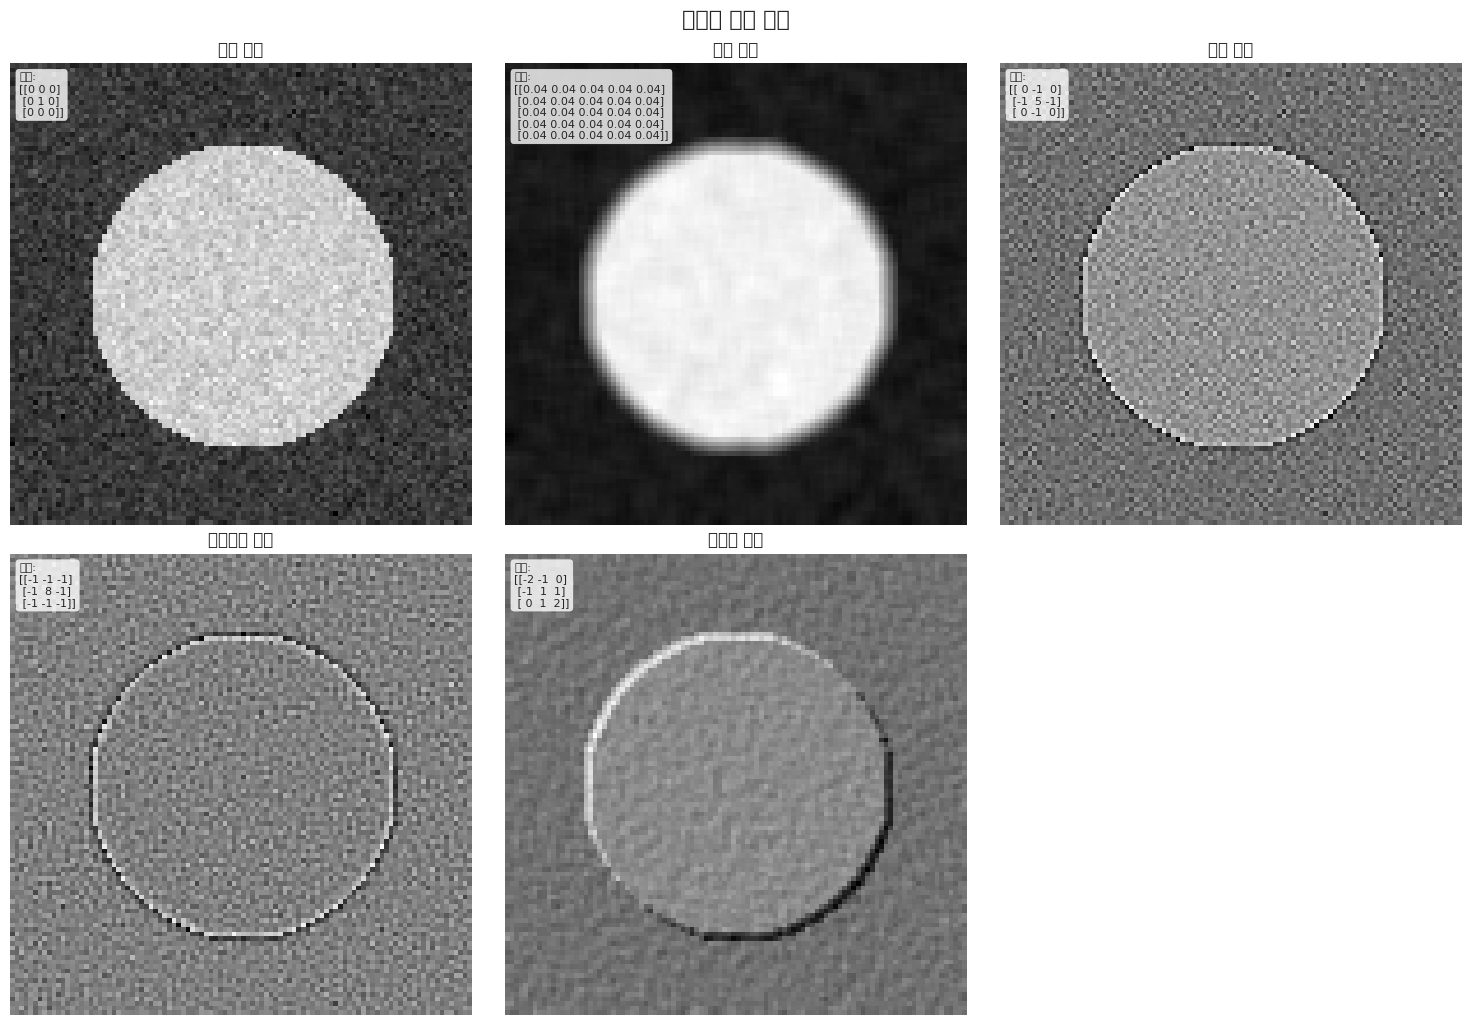

In [62]:
def create_image_filters():
    """이미지 필터 효과 시뮬레이션"""
    # 가상의 이미지 생성 (노이즈가 있는 원)
    size = 100
    center = size // 2
    y, x = np.ogrid[:size, :size]
    
    # 원 모양 이미지
    circle = ((x - center)**2 + (y - center)**2) < (size//3)**2
    
    # 노이즈 추가
    np.random.seed(42)
    noise = np.random.normal(0, 0.1, (size, size))
    noisy_image = circle.astype(float) + noise
    
    # 다양한 필터 커널
    filters = {
        '원본': np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
        '블러': np.ones((5, 5)) / 25,
        '샤픈': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
        '엣지검출': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
        '엠보스': np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
    }
    
    # 컨볼루션 연산 (간단한 구현)
    def apply_filter(image, kernel):
        if kernel.shape == (3, 3) and np.array_equal(kernel, filters['원본']):
            return image
        
        result = np.zeros_like(image)
        k_h, k_w = kernel.shape
        pad_h, pad_w = k_h // 2, k_w // 2
        
        # 패딩 추가
        padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                result[i, j] = np.sum(padded[i:i+k_h, j:j+k_w] * kernel)
        
        return result
    
    # 필터 적용 및 시각화
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, (name, kernel) in enumerate(filters.items()):
        if i >= 6:
            break
            
        if name == '원본':
            filtered = noisy_image
        else:
            filtered = apply_filter(noisy_image, kernel)
        
        im = axes[i].imshow(filtered, cmap='gray')
        axes[i].set_title(f'{name} 필터')
        axes[i].axis('off')
        
        # 커널 시각화 (작은 상자로)
        kernel_normalized = (kernel - kernel.min()) / (kernel.max() - kernel.min() + 1e-8)
        axes[i].text(0.02, 0.98, f'커널:\n{kernel}', 
                    transform=axes[i].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                    fontsize=8)
    
    # 마지막 subplot에는 원본과 모든 필터 결과 비교
    axes[5].axis('off')
    
    plt.tight_layout()
    plt.suptitle('이미지 필터 효과', fontsize=16, y=1.02)
    plt.show()
    
    return noisy_image, filters

# 이미지 필터 실행
original_image, filter_kernels = create_image_filters()

#### 고급 시각화 기법

/tmp/ipykernel_9250/824718539.py:35: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/824718539.py:35: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/zephyr/Desktop/dev/numpy-study/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zephyr/Desktop/dev/numpy-study/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zephyr/Desktop/dev/numpy-study/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zephyr/Desktop/dev/

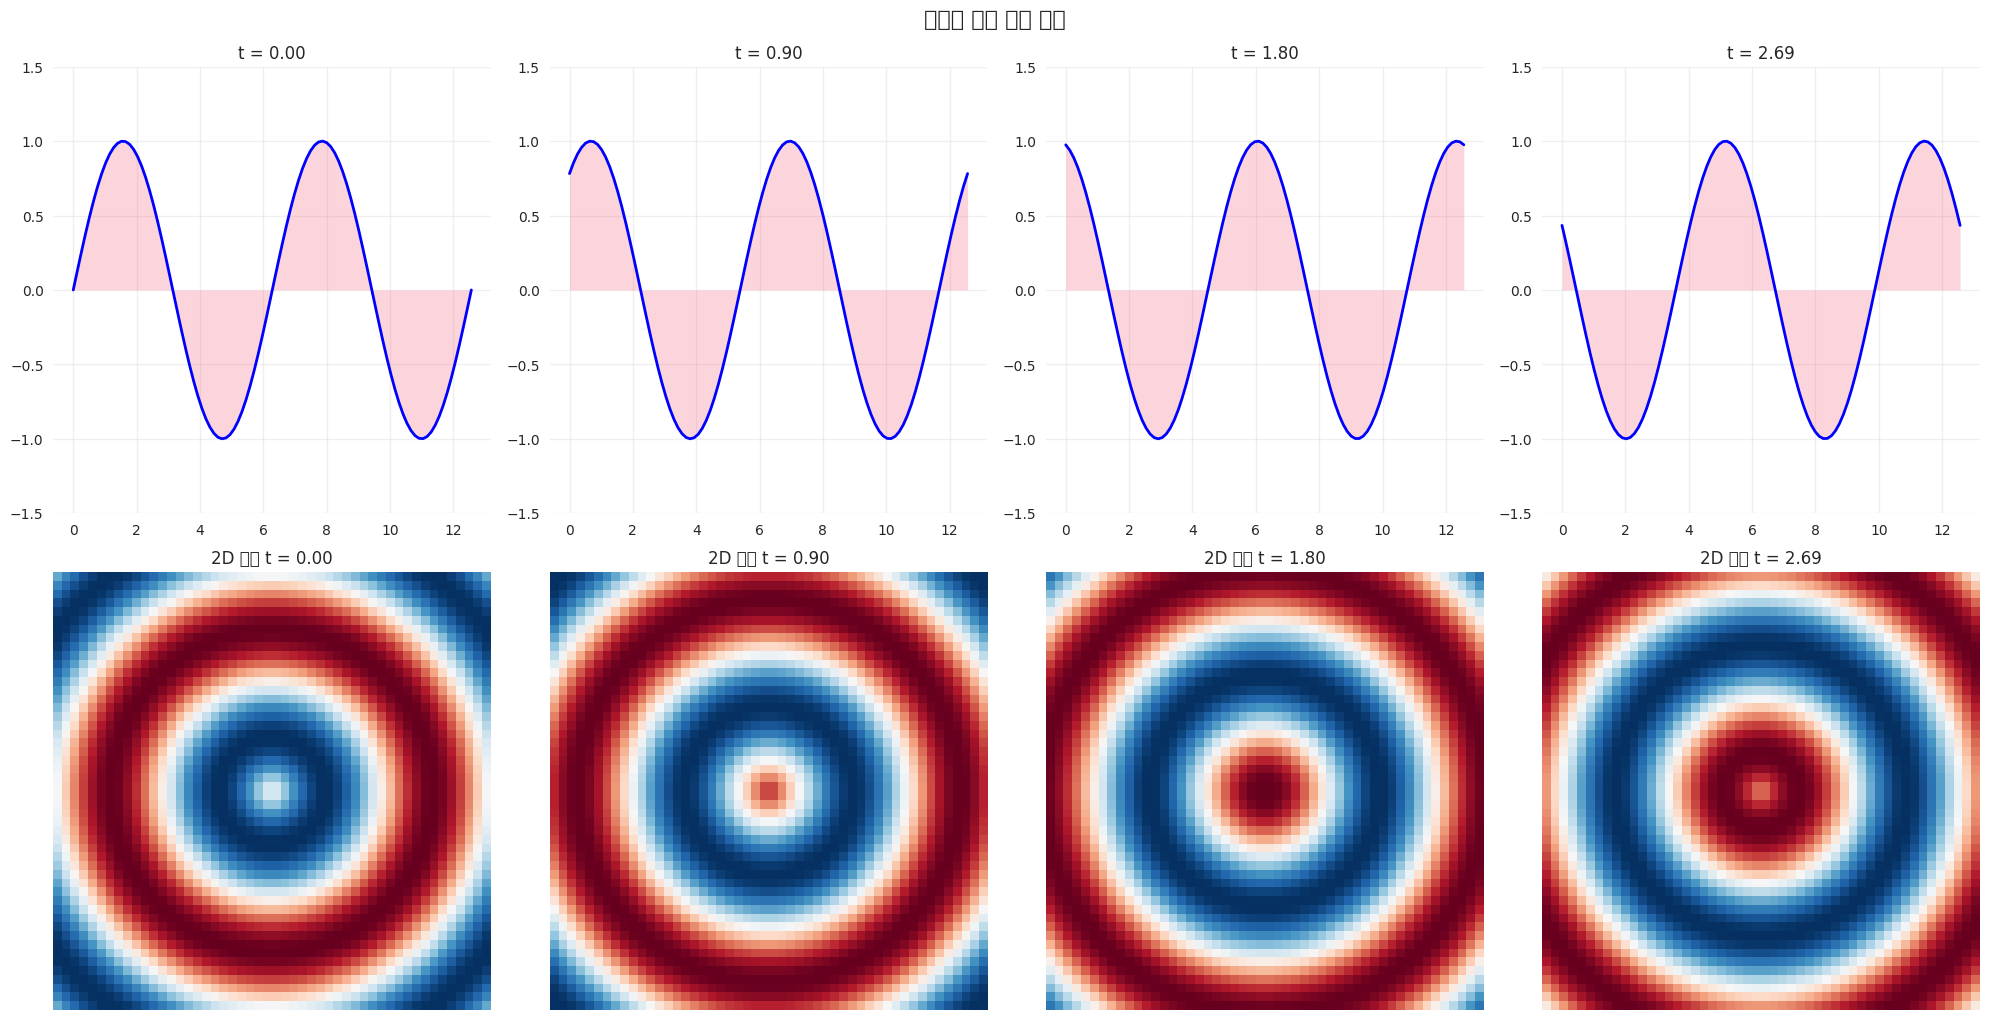

/tmp/ipykernel_9250/824718539.py:100: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/824718539.py:100: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/824718539.py:100: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/824718539.py:100: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/824718539.py:100: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/824718539.py:100: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/824718539.py:100: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from font(s) DejaVu Sans.
  plt.tight_l

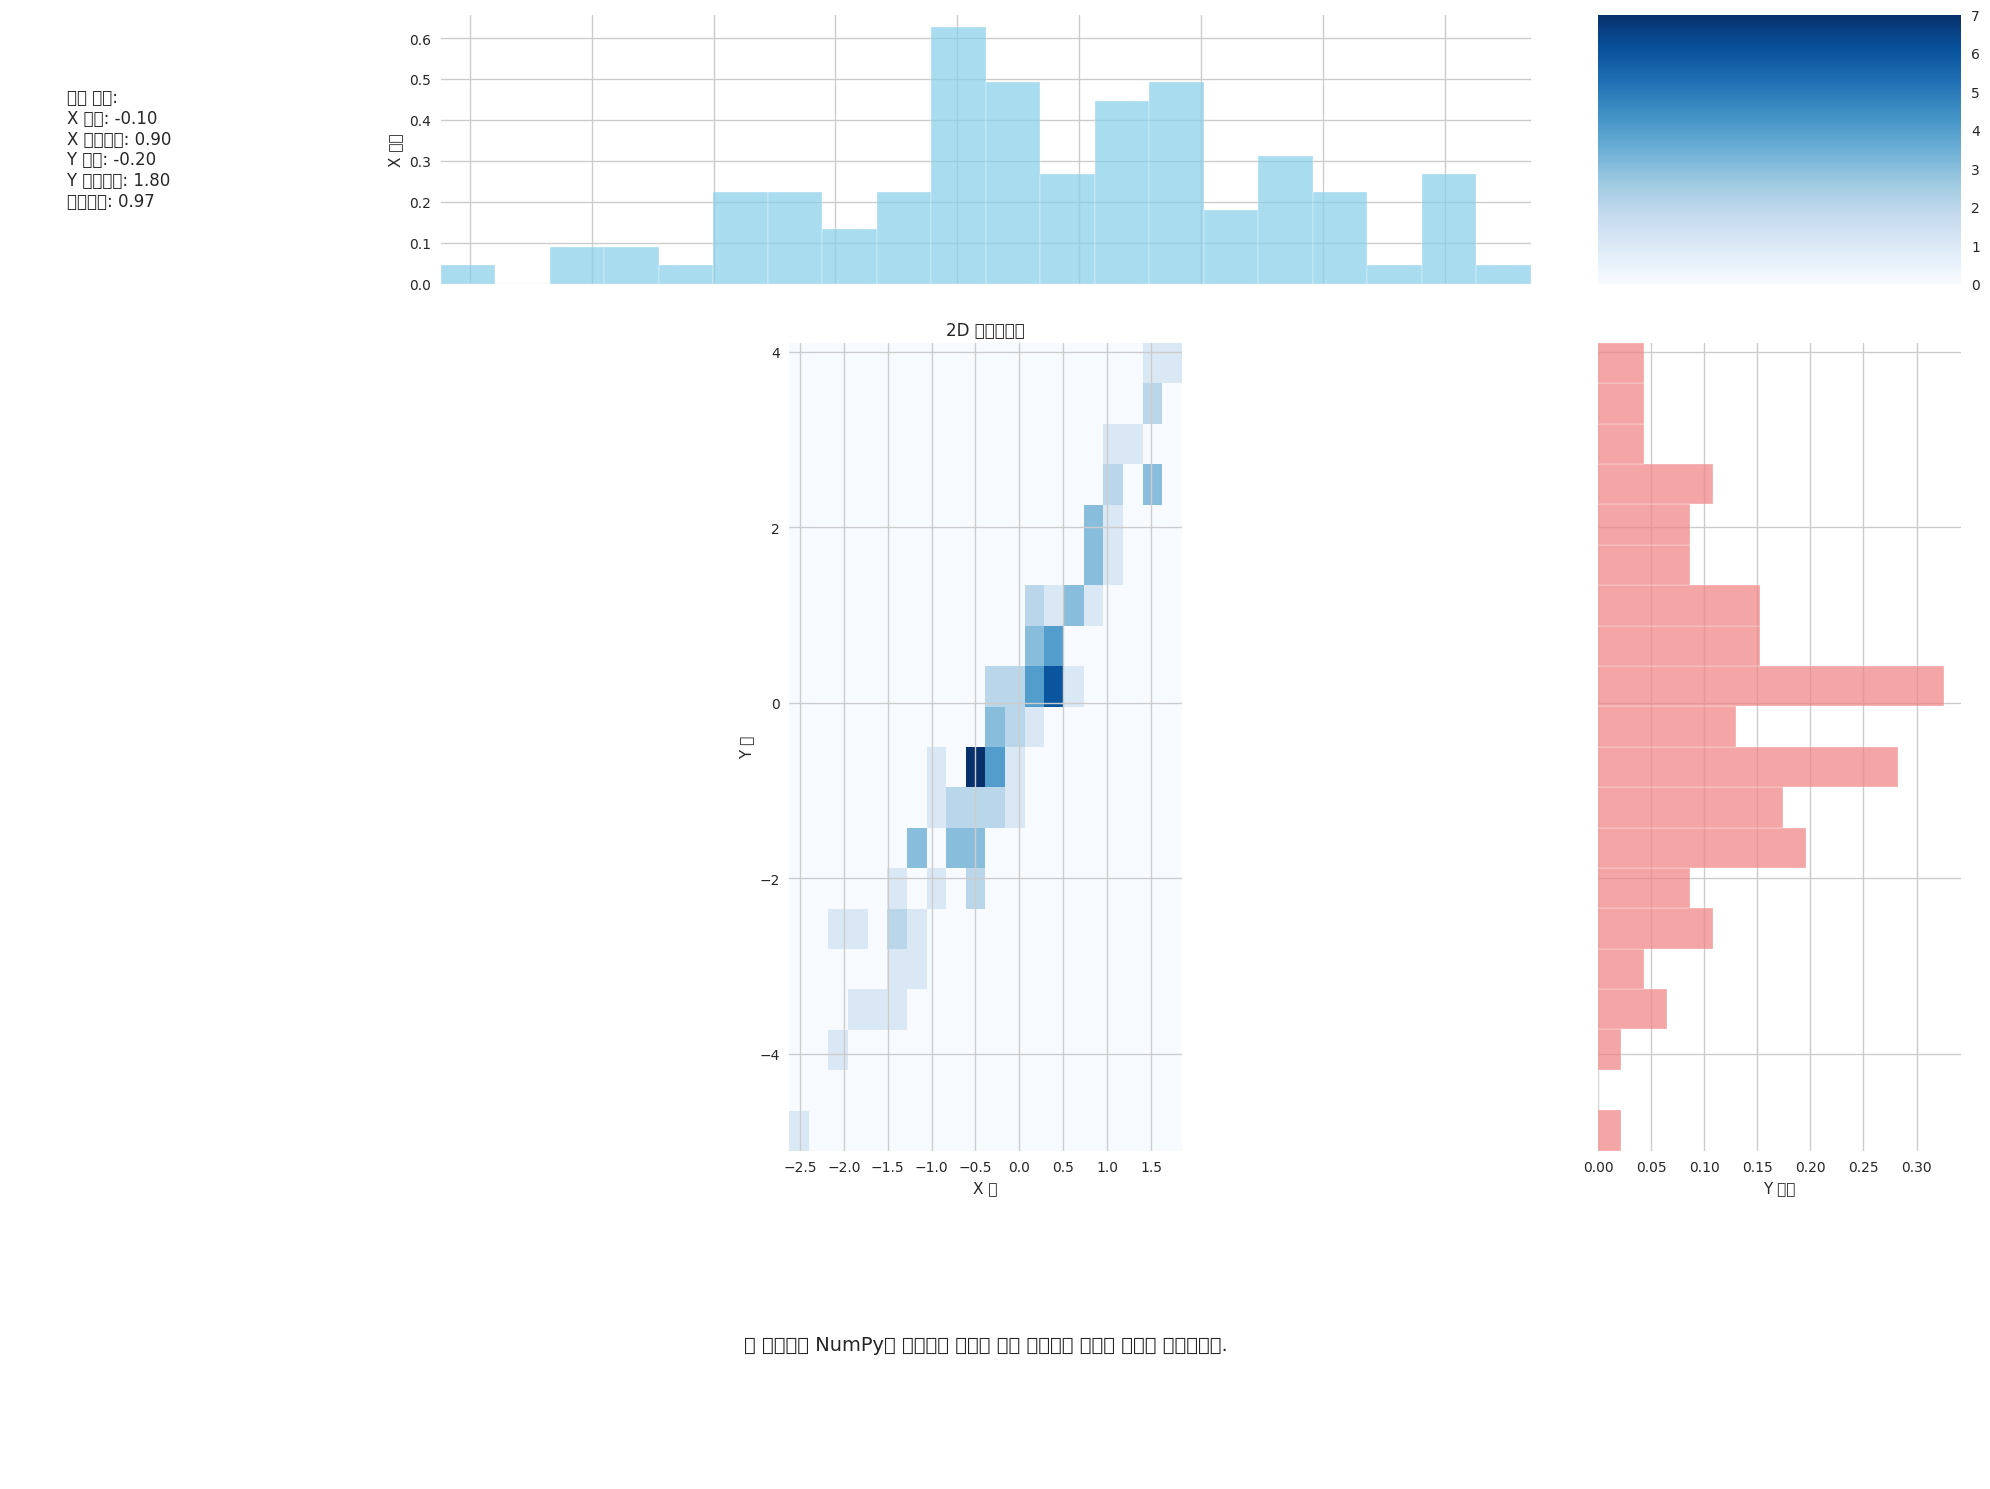

In [63]:
def advanced_visualizations():
    """고급 시각화 기법들"""
    # 1. 애니메이션처럼 보이는 시퀀스
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    
    # 파동의 시간 변화
    x = np.linspace(0, 4*np.pi, 100)
    time_steps = np.linspace(0, 2*np.pi, 8)
    
    for i, t in enumerate(time_steps):
        if i >= 4:
            break
        wave = np.sin(x + t)
        axes[0, i].plot(x, wave, 'b-', linewidth=2)
        axes[0, i].set_ylim(-1.5, 1.5)
        axes[0, i].set_title(f't = {t:.2f}')
        axes[0, i].grid(True, alpha=0.3)
        axes[0, i].fill_between(x, wave, alpha=0.3)
    
    # 2D 파동의 시간 변화
    size = 50
    x = np.linspace(-2*np.pi, 2*np.pi, size)
    y = np.linspace(-2*np.pi, 2*np.pi, size)
    X, Y = np.meshgrid(x, y)
    
    for i, t in enumerate(time_steps):
        if i >= 4:
            break
        wave_2d = np.sin(np.sqrt(X**2 + Y**2) - t)
        im = axes[1, i].imshow(wave_2d, cmap='RdBu', 
                              extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
        axes[1, i].set_title(f'2D 파동 t = {t:.2f}')
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.suptitle('시간에 따른 파동 변화', fontsize=16, y=1.02)
    plt.show()
    
    # 2. 다중 서브플롯 복합 시각화
    fig = plt.figure(figsize=(20, 15))
    
    # 메인 히트맵
    gs = fig.add_gridspec(3, 3, height_ratios=[1, 3, 1], width_ratios=[1, 3, 1])
    
    # 중앙 메인 플롯
    ax_main = fig.add_subplot(gs[1, 1])
    
    # 상관관계 데이터 생성
    np.random.seed(42)
    n = 100
    x = np.random.randn(n)
    y = 2 * x + np.random.randn(n) * 0.5
    
    # 2D 히스토그램
    h, xedges, yedges = np.histogram2d(x, y, bins=20)
    im = ax_main.imshow(h.T, origin='lower', cmap='Blues',
                       extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    ax_main.set_xlabel('X 값')
    ax_main.set_ylabel('Y 값')
    ax_main.set_title('2D 히스토그램')
    
    # 상단 히스토그램 (X 분포)
    ax_top = fig.add_subplot(gs[0, 1], sharex=ax_main)
    ax_top.hist(x, bins=20, alpha=0.7, color='skyblue', density=True)
    ax_top.set_ylabel('X 밀도')
    ax_top.tick_params(labelbottom=False)
    
    # 우측 히스토그램 (Y 분포)
    ax_right = fig.add_subplot(gs[1, 2], sharey=ax_main)
    ax_right.hist(y, bins=20, alpha=0.7, color='lightcoral', 
                 orientation='horizontal', density=True)
    ax_right.set_xlabel('Y 밀도')
    ax_right.tick_params(labelleft=False)
    
    # 통계 정보
    ax_stats = fig.add_subplot(gs[0, 0])
    ax_stats.axis('off')
    stats_text = f"""
    통계 정보:
    X 평균: {np.mean(x):.2f}
    X 표준편차: {np.std(x):.2f}
    Y 평균: {np.mean(y):.2f}
    Y 표준편차: {np.std(y):.2f}
    상관계수: {np.corrcoef(x, y)[0,1]:.2f}
    """
    ax_stats.text(0.1, 0.5, stats_text, fontsize=12, 
                 verticalalignment='center')
    
    # 컬러바
    ax_cbar = fig.add_subplot(gs[0, 2])
    plt.colorbar(im, cax=ax_cbar)
    
    # 하단 추가 정보
    ax_bottom = fig.add_subplot(gs[2, :])
    ax_bottom.axis('off')
    info_text = "이 시각화는 NumPy를 사용하여 생성된 랜덤 데이터의 다차원 분석을 보여줍니다."
    ax_bottom.text(0.5, 0.5, info_text, fontsize=14, 
                  horizontalalignment='center', verticalalignment='center')
    
    plt.tight_layout()
    plt.show()

advanced_visualizations()

### 🎪 7. 인터랙티브 요소가 있는 시각화
#### 다양한 플롯 스타일

/tmp/ipykernel_9250/3546537772.py:25: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/3546537772.py:25: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/3546537772.py:25: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/zephyr/Desktop/dev/numpy-study/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zephyr/Desktop/dev/numpy-study/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zephyr/Desktop/dev/numpy-study/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWar

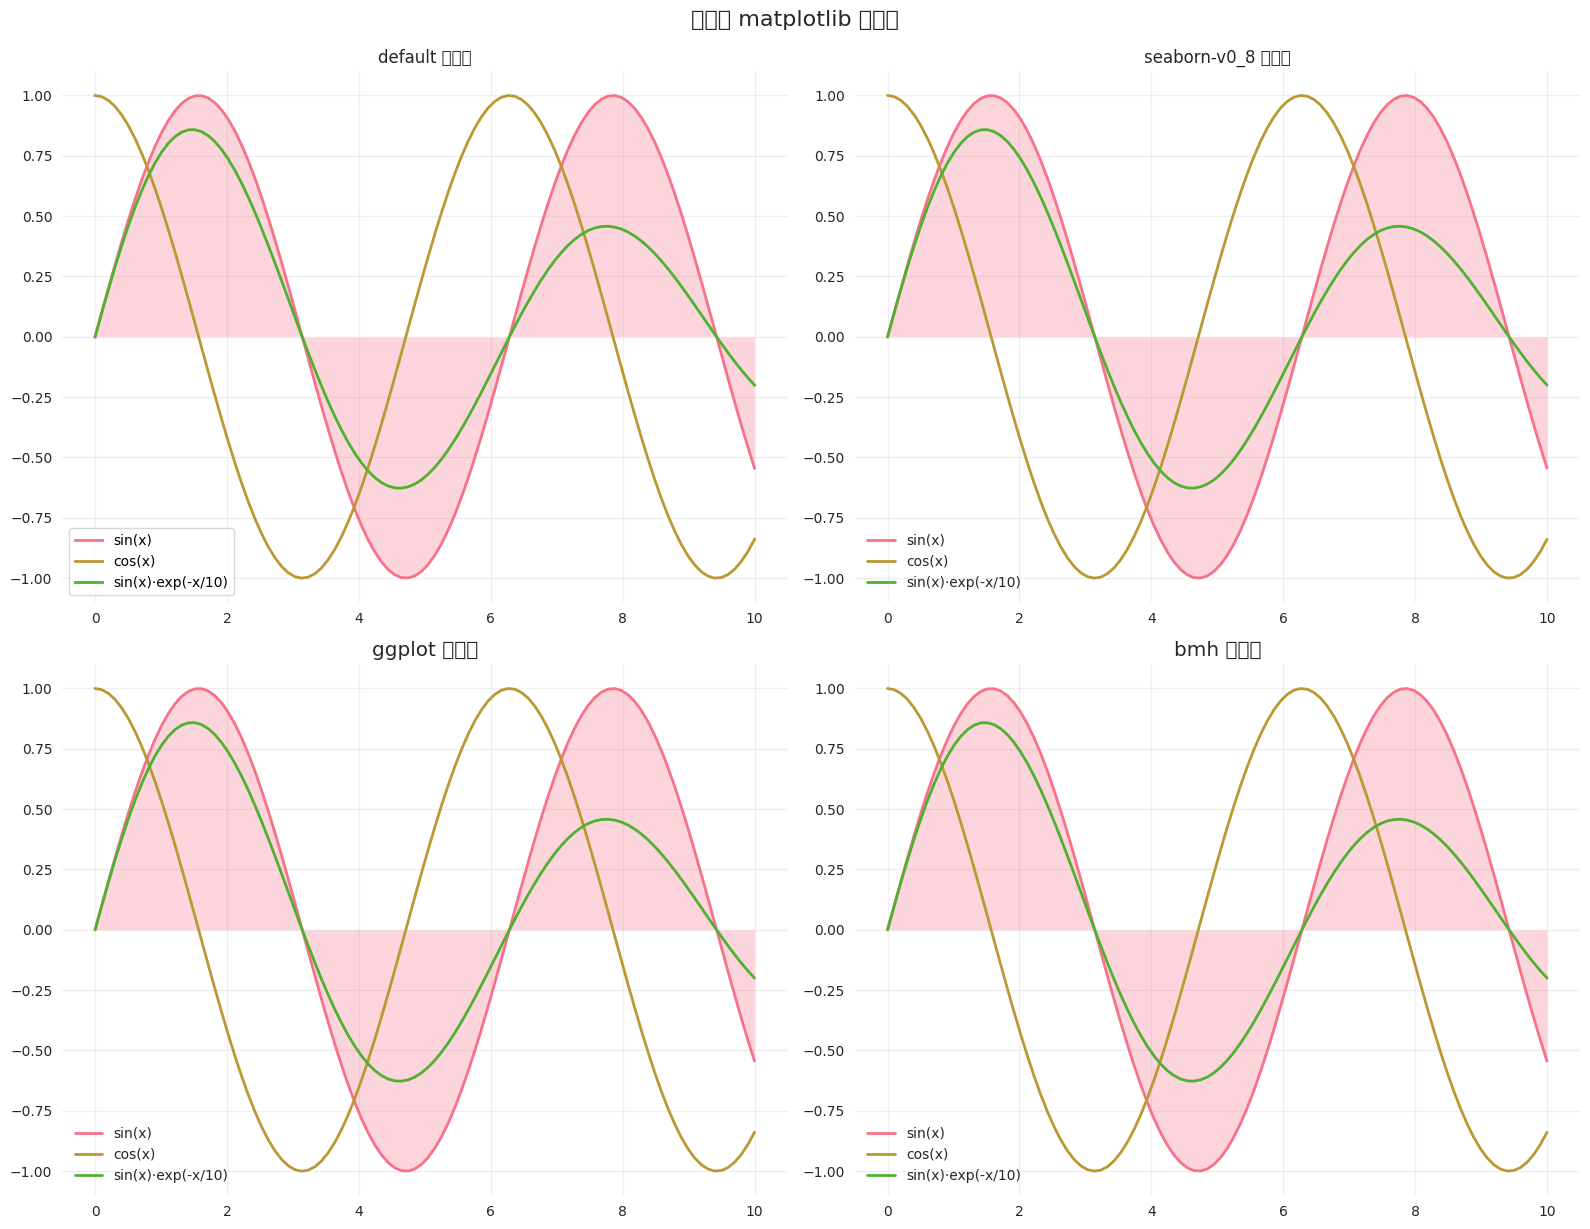

In [64]:
def create_styled_plots():
    """다양한 스타일의 플롯 생성"""
    # 데이터 생성
    x = np.linspace(0, 10, 100)
    y1 = np.sin(x)
    y2 = np.cos(x)
    y3 = np.sin(x) * np.exp(-x/10)
    
    # 여러 스타일로 동일한 데이터 시각화
    styles = ['default', 'seaborn-v0_8', 'ggplot', 'bmh']
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, style in enumerate(styles):
        with plt.style.context(style):
            axes[i].plot(x, y1, label='sin(x)', linewidth=2)
            axes[i].plot(x, y2, label='cos(x)', linewidth=2)
            axes[i].plot(x, y3, label='sin(x)·exp(-x/10)', linewidth=2)
            axes[i].fill_between(x, y1, alpha=0.3)
            axes[i].set_title(f'{style} 스타일')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle('다양한 matplotlib 스타일', fontsize=16, y=1.02)
    plt.show()

create_styled_plots()

#### 실시간 업데이트 시뮬레이션

/tmp/ipykernel_9250/666719234.py:66: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/666719234.py:66: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/666719234.py:66: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/666719234.py:66: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/666719234.py:66: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/666719234.py:66: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/666719234.py:66: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp

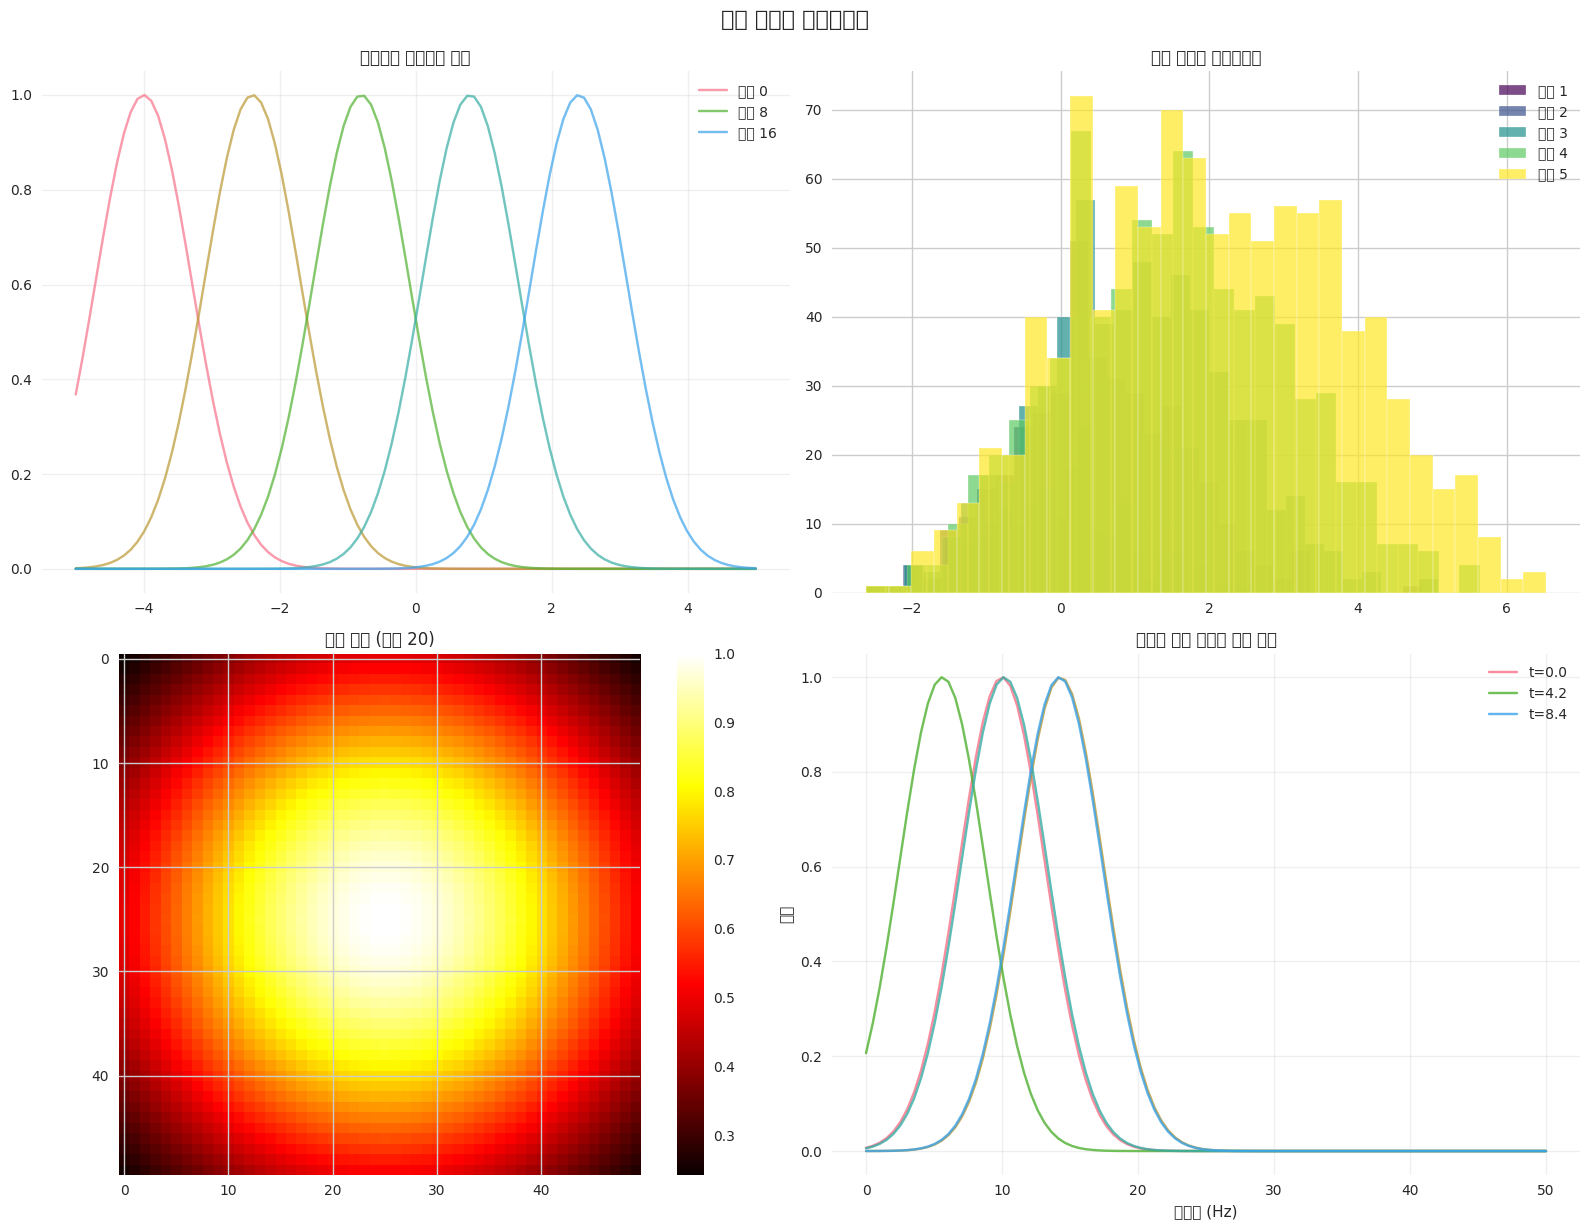

In [65]:
def simulate_real_time_data():
    """실시간 데이터 업데이트 시뮬레이션"""
    # 시간 단계별로 변화하는 데이터
    time_steps = 20
    x = np.linspace(-5, 5, 100)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. 가우시안 분포의 이동
    for i in range(0, time_steps, 4):
        center = -4 + i * 0.4
        gaussian = np.exp(-(x - center)**2)
        axes[0, 0].plot(x, gaussian, alpha=0.7, 
                       label=f'시간 {i}' if i % 8 == 0 else "")
    
    axes[0, 0].set_title('이동하는 가우시안 분포')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. 누적 히스토그램
    np.random.seed(42)
    all_data = []
    colors = plt.cm.viridis(np.linspace(0, 1, 5))
    
    for i in range(5):
        new_data = np.random.normal(i, 1, 200)
        all_data.extend(new_data)
        axes[0, 1].hist(all_data, bins=30, alpha=0.7, 
                       color=colors[i], label=f'단계 {i+1}')
    
    axes[0, 1].set_title('누적 데이터 히스토그램')
    axes[0, 1].legend()
    
    # 3. 확산 과정
    size = 50
    center = size // 2
    diffusion_steps = [0, 5, 10, 15, 20]
    
    for i, step in enumerate(diffusion_steps):
        # 간단한 확산 시뮬레이션
        y, x = np.ogrid[:size, :size]
        distance = np.sqrt((x - center)**2 + (y - center)**2)
        concentration = np.exp(-distance**2 / (2 * (step + 1)**2))
        
        if i == len(diffusion_steps) - 1:  # 마지막 단계만 표시
            im = axes[1, 0].imshow(concentration, cmap='hot')
            axes[1, 0].set_title(f'확산 과정 (단계 {step})')
            plt.colorbar(im, ax=axes[1, 0])
    
    # 4. 주파수 스펙트럼 변화
    frequencies = np.linspace(0, 50, 100)
    time_points = np.linspace(0, 10, 20)
    
    for i, t in enumerate(time_points[::4]):
        # 시간에 따라 변하는 주파수 응답
        response = np.exp(-(frequencies - 10 - 5*np.sin(t))**2 / 20)
        axes[1, 1].plot(frequencies, response, alpha=0.8, 
                       label=f't={t:.1f}' if i % 2 == 0 else "")
    
    axes[1, 1].set_title('시간에 따른 주파수 응답 변화')
    axes[1, 1].set_xlabel('주파수 (Hz)')
    axes[1, 1].set_ylabel('응답')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle('동적 데이터 시뮬레이션', fontsize=16, y=1.02)
    plt.show()

simulate_real_time_data()

### 🎨 8. 최종 종합 예제
#### NumPy 아트 갤러리

/tmp/ipykernel_9250/349401254.py:170: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/349401254.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/349401254.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/349401254.py:170: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/349401254.py:170: UserWarning: Glyph 53556 (\N{HANGUL SYLLABLE TEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/349401254.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9250/349401254.py:170: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
  plt.tigh

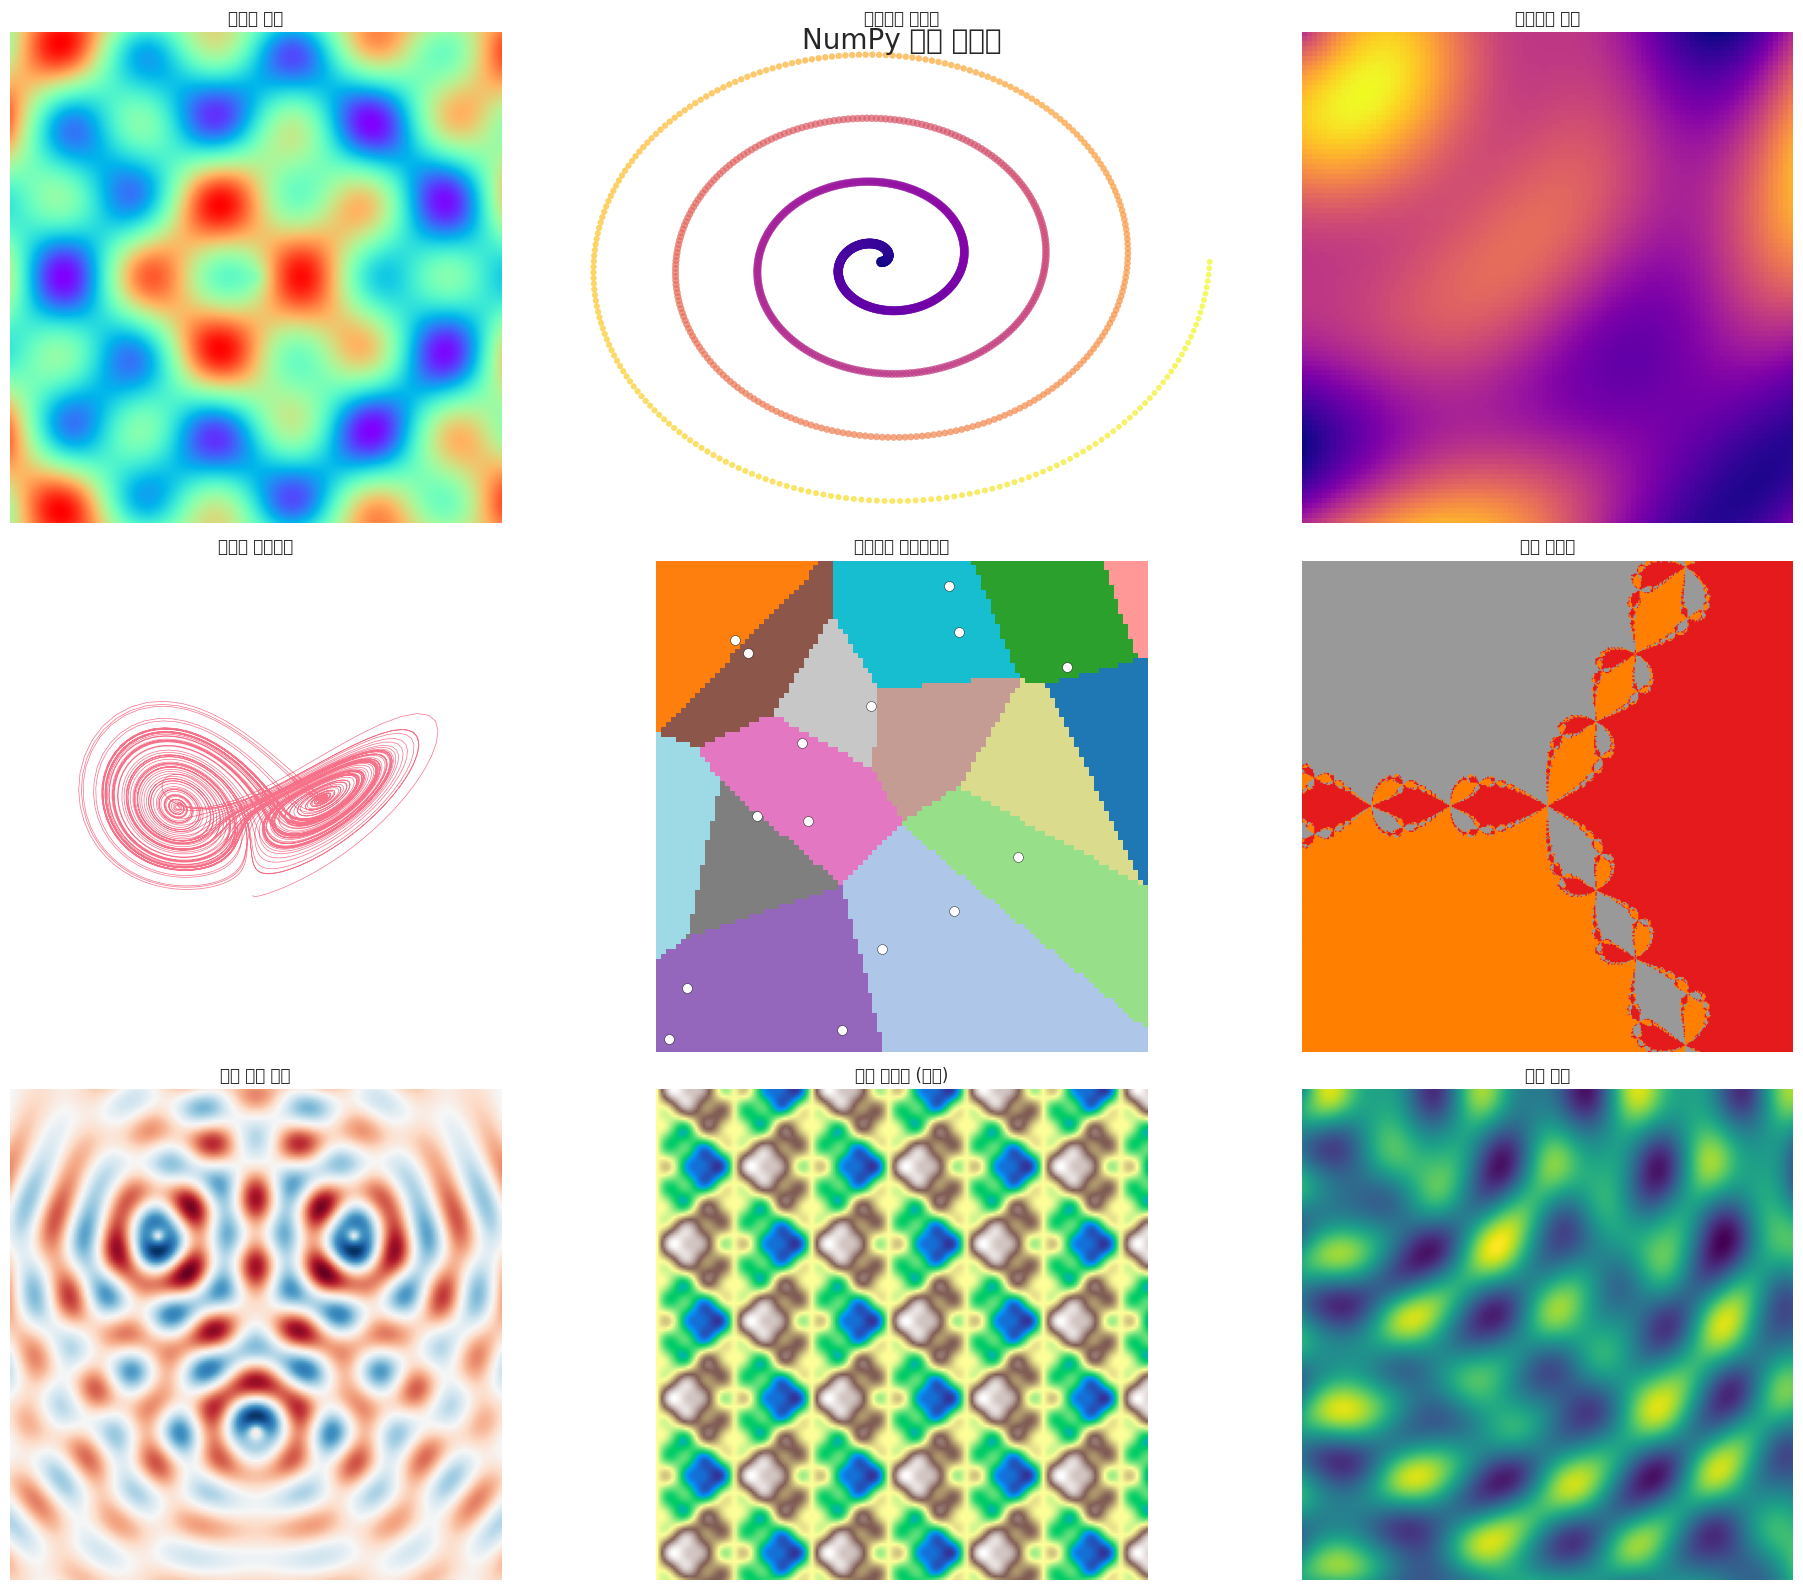

In [66]:
def numpy_art_gallery():
    """NumPy로 만든 예술 작품들"""
    fig = plt.figure(figsize=(20, 16))
    
    # 1. 만화경 패턴
    ax1 = plt.subplot(3, 3, 1)
    size = 200
    x = np.linspace(-2, 2, size)
    y = np.linspace(-2, 2, size)
    X, Y = np.meshgrid(x, y)
    
    kaleidoscope = np.sin(5*X) * np.cos(5*Y) + np.sin(3*np.sqrt(X**2 + Y**2))
    ax1.imshow(kaleidoscope, cmap='rainbow')
    ax1.set_title('만화경 패턴')
    ax1.axis('off')
    
    # 2. 스파이럴 갤럭시
    ax2 = plt.subplot(3, 3, 2)
    theta = np.linspace(0, 8*np.pi, 1000)
    r = theta * 0.1
    x_spiral = r * np.cos(theta)
    y_spiral = r * np.sin(theta)
    
    # 포인트 크기를 거리에 따라 조절
    sizes = 50 * np.exp(-theta/20)
    ax2.scatter(x_spiral, y_spiral, s=sizes, c=theta, cmap='plasma', alpha=0.7)
    ax2.set_title('스파이럴 갤럭시')
    ax2.axis('off')
    ax2.set_facecolor('black')
    
    # 3. 플라즈마 효과
    ax3 = plt.subplot(3, 3, 3)
    size = 100
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)
    
    plasma = (np.sin(X/16) + np.sin(Y/16) + 
              np.sin((X+Y)/16) + np.sin(np.sqrt(X**2 + Y**2)/8))
    ax3.imshow(plasma, cmap='plasma')
    ax3.set_title('플라즈마 효과')
    ax3.axis('off')
    
    # 4. 로렌츠 어트랙터 (카오스 이론)
    ax4 = plt.subplot(3, 3, 4, projection='3d')
    
    def lorenz(x, y, z, s=10, r=28, b=2.667):
        x_dot = s*(y - x)
        y_dot = r*x - y - x*z
        z_dot = x*y - b*z
        return x_dot, y_dot, z_dot
    
    dt = 0.01
    num_steps = 10000
    
    xs, ys, zs = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    xs[0], ys[0], zs[0] = 0, 1, 1.05
    
    for i in range(num_steps - 1):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    
    ax4.plot(xs, ys, zs, lw=0.5)
    ax4.set_title('로렌츠 어트랙터')
    ax4.axis('off')
    
    # 5. 보로노이 다이어그램 시뮬레이션
    ax5 = plt.subplot(3, 3, 5)
    size = 100
    n_points = 15
    
    # 랜덤 시드 포인트
    np.random.seed(42)
    seed_points = np.random.random((n_points, 2)) * size
    
    # 각 픽셀에 대해 가장 가까운 시드 포인트 찾기
    voronoi = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            distances = np.sqrt((seed_points[:, 0] - i)**2 + 
                              (seed_points[:, 1] - j)**2)
            voronoi[i, j] = np.argmin(distances)
    
    ax5.imshow(voronoi, cmap='tab20')
    ax5.scatter(seed_points[:, 0], seed_points[:, 1], 
               c='white', s=50, edgecolor='black')
    ax5.set_title('보로노이 다이어그램')
    ax5.axis('off')
    
    # 6. 복소함수 시각화
    ax6 = plt.subplot(3, 3, 6)
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y
    
    # z^3 - 1 = 0의 근 찾기 (뉴턴 방법)
    roots = [1, -0.5 + 0.866j, -0.5 - 0.866j]
    
    def newton_iteration(z):
        return z - (z**3 - 1) / (3 * z**2)
    
    # 수렴하는 근에 따라 색칠
    max_iter = 50
    result = np.zeros(Z.shape)
    
    for _ in range(max_iter):
        Z = newton_iteration(Z)
    
    for i, root in enumerate(roots):
        mask = np.abs(Z - root) < 0.1
        result[mask] = i
    
    ax6.imshow(result, cmap='Set1', extent=[-2, 2, -2, 2])
    ax6.set_title('뉴턴 프랙탈')
    ax6.axis('off')
    
    # 7. 웨이브 간섭 패턴
    ax7 = plt.subplot(3, 3, 7)
    size = 200
    x = np.linspace(-5, 5, size)
    y = np.linspace(-5, 5, size)
    X, Y = np.meshgrid(x, y)
    
    # 여러 점 소스에서 나오는 파동
    sources = [(-2, -2), (2, -2), (0, 2)]
    wave_sum = np.zeros_like(X)
    
    for sx, sy in sources:
        distance = np.sqrt((X - sx)**2 + (Y - sy)**2)
        wave_sum += np.sin(5 * distance) / (distance + 1)
    
    ax7.imshow(wave_sum, cmap='RdBu', extent=[-5, 5, -5, 5])
    ax7.set_title('파동 간섭 패턴')
    ax7.axis('off')
    
    # 8. 펄린 노이즈 시뮬레이션
    ax8 = plt.subplot(3, 3, 8)
    
    def simple_noise(x, y, scale=0.1):
        return np.sin(x * scale) * np.cos(y * scale) + \
               0.5 * np.sin(x * scale * 2) * np.cos(y * scale * 2) + \
               0.25 * np.sin(x * scale * 4) * np.cos(y * scale * 4)
    
    size = 200
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)
    noise = simple_noise(X, Y)
    
    ax8.imshow(noise, cmap='terrain')
    ax8.set_title('펄린 노이즈 (지형)')
    ax8.axis('off')
    
    # 9. 최종 합성 아트
    ax9 = plt.subplot(3, 3, 9)
    
    # 여러 레이어 합성
    layer1 = np.sin(X/10) * np.cos(Y/10)
    layer2 = np.sin(np.sqrt(X**2 + Y**2)/5)
    layer3 = simple_noise(X, Y, 0.05)
    
    composite = layer1 + 0.5 * layer2 + 0.3 * layer3
    ax9.imshow(composite, cmap='viridis')
    ax9.set_title('합성 아트')
    ax9.axis('off')
    
    plt.tight_layout()
    plt.suptitle('NumPy 아트 갤러리', fontsize=20, y=0.98)
    plt.show()

numpy_art_gallery()

## ⚡ 성능 최적화 팁
### 메모리 프리-할당

In [67]:
import time

# 비효율적인 방법: 계속 새로운 배열 생성
start_time = time.time()
result = np.array([])
for i in range(10000):
    result = np.append(result, i)
slow_time = time.time() - start_time

# 효율적인 방법: 미리 할당
start_time = time.time()
result = np.zeros(10000)
for i in range(10000):
    result[i] = i
fast_time = time.time() - start_time

print(f"비효율적 방법: {slow_time:.4f}초")
print(f"효율적 방법: {fast_time:.4f}초")
print(f"속도 향상: {slow_time/fast_time:.1f}배")


# 큰 이미지 처리시 dtype 최적화
large_image = np.random.random((1000, 1000)).astype(np.float32)  # float64 대신 float32

# 벡터화 연산 활용
# 느림: for 루프
# 빠름: NumPy 브로드캐스팅

비효율적 방법: 0.0428초
효율적 방법: 0.0018초
속도 향상: 23.8배


### 메모리 연속성 확인

In [68]:
# C-연속 vs Fortran-연속
c_array = np.array([[1, 2, 3], [4, 5, 6]], order='C')
f_array = np.array([[1, 2, 3], [4, 5, 6]], order='F')

print(f"C-연속 플래그: {c_array.flags['C_CONTIGUOUS']}")
print(f"F-연속 플래그: {f_array.flags['F_CONTIGUOUS']}")

# 전치 후 연속성 변화
c_transposed = c_array.T
print(f"전치 후 C-연속: {c_transposed.flags['C_CONTIGUOUS']}")
print(f"전치 후 F-연속: {c_transposed.flags['F_CONTIGUOUS']}")


C-연속 플래그: True
F-연속 플래그: True
전치 후 C-연속: False
전치 후 F-연속: True


#### 시각화 품질 향상

In [69]:
# 고해상도 저장
plt.savefig('output.png', dpi=300, bbox_inches='tight')

# 벡터 그래픽으로 저장
plt.savefig('output.pdf', format='pdf')

<Figure size 1200x800 with 0 Axes>

## 🚨 자주 하는 실수들
### 1. 의도치 않은 뷰 생성

In [70]:
# 위험한 코드
original = np.array([[1, 2], [3, 4]])
sliced = original[0]  # 뷰가 생성됨
sliced[0] = 999
print(f"원본이 변경됨: {original}")

# 안전한 코드
original = np.array([[1, 2], [3, 4]])
sliced = original[0].copy()  # 복사본 생성
sliced[0] = 999
print(f"원본이 보호됨: {original}")

원본이 변경됨: [[999   2]
 [  3   4]]
원본이 보호됨: [[1 2]
 [3 4]]


### 2. 부동소수점 비교

In [71]:
# 잘못된 비교
a = np.array([0.1 + 0.2])
b = np.array([0.3])
print(f"0.1 + 0.2 == 0.3: {a == b}")  # False!

# 올바른 비교
print(f"거의 같음: {np.allclose(a, b)}")
print(f"차이: {np.abs(a - b)}")

0.1 + 0.2 == 0.3: [False]
거의 같음: True
차이: [5.55111512e-17]


### 3. 차원 혼동

In [72]:
# 1차원 vs 2차원 구별
arr_1d = np.array([1, 2, 3])
arr_2d = np.array([[1, 2, 3]])

print(f"1D 형태: {arr_1d.shape}")  # (3,)
print(f"2D 형태: {arr_2d.shape}")  # (1, 3)

# 차원 추가/제거
added_dim = arr_1d[:, np.newaxis]  # 또는 arr_1d.reshape(-1, 1)
removed_dim = arr_2d.squeeze()

print(f"차원 추가: {added_dim.shape}")
print(f"차원 제거: {removed_dim.shape}")

1D 형태: (3,)
2D 형태: (1, 3)
차원 추가: (3, 1)
차원 제거: (3,)
